1.   LONG SHORT-TERM MEMORY (LSTM)
3.   SUPPORT VECTOR MACHINE (SVM)
5.   VARIATIONAL AUTOENCODER (VAE)

In [1]:
!pip install -q --force-reinstall \
    tensorflow==2.19.0 \
    tf-keras==2.19.0 \
    tensorflow-text==2.19.0 \
    tensorflow-decision-forests==1.12.0 \
    pandas==2.2.2 \
    "numpy<2.3.0,>=2.0.0" \
    opencv-python-headless==4.12.0.88 \
    opencv-python==4.12.0.88 \
    opencv-contrib-python==4.12.0.88 \
    numba==0.60.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 837.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("=" * 80)
print("SYSTEM INFORMATION")
print("=" * 80)
print(f"TensorFlow Version: {tf.__version__}")
print(f"Python Version: {sys.version}")

SYSTEM INFORMATION
TensorFlow Version: 2.19.0
Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU Detected: {len(gpus)} GPU(s)")
    for gpu in gpus:
        print(f"  - {gpu}")

    # Configure GPU memory growth
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"⚠️ Warning: {e}")

    # Set mixed precision for better performance
    try:
        tf.keras.mixed_precision.set_global_policy('mixed_float16')
        print("✅ Mixed precision policy set")
    except:
        print("⚠️ Could not set mixed precision")

    # Test GPU
    with tf.device('/GPU:0'):
        test_tensor = tf.random.normal((1000, 1000))
        result = tf.matmul(test_tensor, test_tensor)
    print("✅ GPU test passed - operations running on GPU")

else:
    print("❌ No GPU detected. Training will be slower.")
    print("⚠️ To enable GPU: Runtime → Change runtime type → GPU")

# Memory info
try:
    from tensorflow.python.client import device_lib
    device_details = device_lib.list_local_devices()
    for device in device_details:
        if device.device_type == 'GPU':
            print(f"GPU Memory: {device.memory_limit / 1e9:.2f} GB")
except:
    pass

print("\n✅ Environment setup complete!")


❌ No GPU detected. Training will be slower.
⚠️ To enable GPU: Runtime → Change runtime type → GPU

✅ Environment setup complete!


In [ ]:
import zipfile
import os

zip_file_path = '/content/Hand on ML - Assignemnt.zip'
extraction_dir = '/content/extracted_zip'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"'{zip_file_path}' extracted to '{extraction_dir}'")

# List the contents of the extracted directory to verify
print(f"Contents of '{extraction_dir}':")
for item in os.listdir(extraction_dir):
    print(f"- {item}")

'/content/Hand on ML - Assignemnt.zip' extracted to '/content/extracted_zip'
Contents of '/content/extracted_zip':
- Hand on ML - Assignemnt


In [ ]:
def load_datasets(base_path):
    datasets = {}
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(root, file)
                file_name = os.path.splitext(file)[0]
                datasets[file_name] = pd.read_csv(file_path)
    return datasets

# Load all files
base_path = '/content/extracted_zip/Hand on ML - Assignemnt/RawData'
datasets = load_datasets(base_path)

print("Loaded datasets:", list(datasets.keys()))
print("\n" + "="*50)

Loaded datasets: ['Malfunction2', 'Malfunction1', 'Dos1', 'Dos2', 'Normal3', 'Normal2', 'Normal4', 'Normal1']



In [ ]:
# Analyze each dataset
for name, df in datasets.items():
    print(f"\nDataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {len(df.columns)}")
    print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

    # Check target variable presence
    if 'label' not in df.columns and 'class' not in df.columns:
        print("No explicit target variable found")

    # Check data types
    print("\nData Types:")
    print(df.dtypes.value_counts())

    # Check for S.No column
    if 'S.No' in df.columns:
        print(f"S.No range: {df['S.No'].min()} to {df['S.No'].max()}")

    # Check time columns
    time_cols = [col for col in df.columns if 'Time' in col]
    print(f"Time columns: {len(time_cols)}")


Dataset: Malfunction2
Shape: (8990, 79)
Columns: 79
Memory usage: 5.42 MB
No explicit target variable found

Data Types:
float64    76
int64       3
Name: count, dtype: int64
S.No range: 0 to 8989
Time columns: 11

Dataset: Malfunction1
Shape: (9040, 79)
Columns: 79
Memory usage: 5.45 MB
No explicit target variable found

Data Types:
float64    76
int64       3
Name: count, dtype: int64
S.No range: 0 to 9039
Time columns: 11

Dataset: Dos1
Shape: (17204, 79)
Columns: 79
Memory usage: 10.37 MB
No explicit target variable found

Data Types:
float64    76
int64       3
Name: count, dtype: int64
S.No range: 0 to 17203
Time columns: 11

Dataset: Dos2
Shape: (2383, 79)
Columns: 79
Memory usage: 1.44 MB
No explicit target variable found

Data Types:
float64    76
int64       3
Name: count, dtype: int64
S.No range: 0 to 2382
Time columns: 11

Dataset: Normal3
Shape: (14359, 79)
Columns: 79
Memory usage: 8.65 MB
No explicit target variable found

Data Types:
float64    76
int64       3
Name: c

In [ ]:
# Combine all datasets with labels
def add_labels_and_combine(datasets):
    all_data = []

    # Define labels based on folder names
    labels_map = {
        'Normal1': 'normal',
        'Normal2': 'normal',
        'Normal3': 'normal',
        'Normal4': 'normal',
        'Malfunction1': 'malfunction',
        'Malfunction2': 'malfunction',
        'Dos1': 'dos',
        'Dos2': 'dos'
    }

    for name, df in datasets.items():
        # Extract base name without numbers
        base_name = ''.join([i for i in name if not i.isdigit()])

        # Assign label
        if name in labels_map:
            label = labels_map[name]
        elif 'Normal' in name:
            label = 'normal'
        elif 'Malfunction' in name:
            label = 'malfunction'
        elif 'Dos' in name:
            label = 'dos'
        else:
            label = 'unknown'

        # Add label column
        df['label'] = label
        df['dataset_source'] = name

        all_data.append(df)

    # Combine all
    combined_df = pd.concat(all_data, ignore_index=True)

    print(f"Combined dataset shape: {combined_df.shape}")
    print(f"\nLabel distribution:")
    print(combined_df['label'].value_counts())

    return combined_df

combined_df = add_labels_and_combine(datasets)

Combined dataset shape: (87417, 81)

Label distribution:
label
normal         49800
dos            19587
malfunction    18030
Name: count, dtype: int64


DATA EXPLORATION SUMMARY

📐 Dataset Dimensions: 87417 rows × 81 columns

📊 Data Types:
float64    76
int64       3
object      2
Name: count, dtype: int64

🔍 First 5 rows:


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB,label,dataset_source
0,0,1.729688e+09,59,0,33.63709,72.991302,1.25,1.729688e+09,21351.0,1.729688e+09,...,5.0,1.729688e+09,0.8,-54.0,1.729688e+09,7.3,1.729688e+09,7.6,malfunction,Malfunction2
1,1,1.729688e+09,66,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,malfunction,Malfunction2
2,2,1.729688e+09,369,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,malfunction,Malfunction2
3,3,1.729688e+09,2111,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,malfunction,Malfunction2
4,4,1.729688e+09,2112,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,malfunction,Malfunction2



📈 Basic Statistics:


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
count,87417.000000,8.741700e+04,87417.000000,87417.0,87417.000000,87417.000000,87417.000000,4.349000e+03,4349.000000,4.349000e+03,...,466.000000,466.0,466.000000,8.500000e+01,85.000000,85.000000,1.820000e+02,182.000000,5.530000e+02,553.000000
mean,6633.756363,1.729593e+09,126929.651487,0.0,33.664535,73.002702,4.374865,1.729626e+09,8946.337089,1.729626e+09,...,0.699571,1.0,4.841202,1.729613e+09,0.902185,-46.470588,1.729647e+09,15.958791,1.729644e+09,10.234720
std,4566.256233,2.001018e+05,98296.621753,0.0,0.031810,0.012993,2.820141,2.045361e+05,6819.779788,2.045361e+05,...,0.458937,0.0,0.512739,2.072144e+05,0.095030,7.105645,1.975626e+05,15.360037,1.964418e+05,10.221969
min,0.000000,1.729315e+09,1.000000,0.0,33.636529,72.991018,1.250000,1.729315e+09,0.000000,1.729315e+09,...,0.000000,1.0,3.000000,1.729315e+09,0.628571,-66.000000,1.729315e+09,0.000000,1.729315e+09,4.900000
25%,2781.000000,1.729405e+09,52717.000000,0.0,33.636642,72.991309,2.269000,1.729405e+09,712.000000,1.729405e+09,...,0.000000,1.0,5.000000,1.729405e+09,0.828571,-52.000000,1.729406e+09,7.525000,1.729406e+09,5.600000
50%,5903.000000,1.729686e+09,118526.000000,0.0,33.637122,72.991634,3.451000,1.729686e+09,8704.000000,1.729686e+09,...,1.000000,1.0,5.000000,1.729688e+09,0.914286,-46.000000,1.729688e+09,10.500000,1.729688e+09,5.800000
75%,9794.000000,1.729786e+09,176584.000000,0.0,33.697880,73.016555,5.978000,1.729787e+09,15015.000000,1.729787e+09,...,1.000000,1.0,5.000000,1.729786e+09,1.000000,-40.000000,1.729787e+09,16.725000,1.729787e+09,6.600000
max,17868.000000,1.729874e+09,450486.000000,0.0,33.707439,73.019869,15.985000,1.729874e+09,21832.000000,1.729874e+09,...,1.000000,1.0,5.000000,1.729874e+09,1.000000,-34.000000,1.729874e+09,99.300000,1.729874e+09,44.000000



🎯 Target Variable Distribution:
label
normal         49800
dos            19587
malfunction    18030
Name: count, dtype: int64


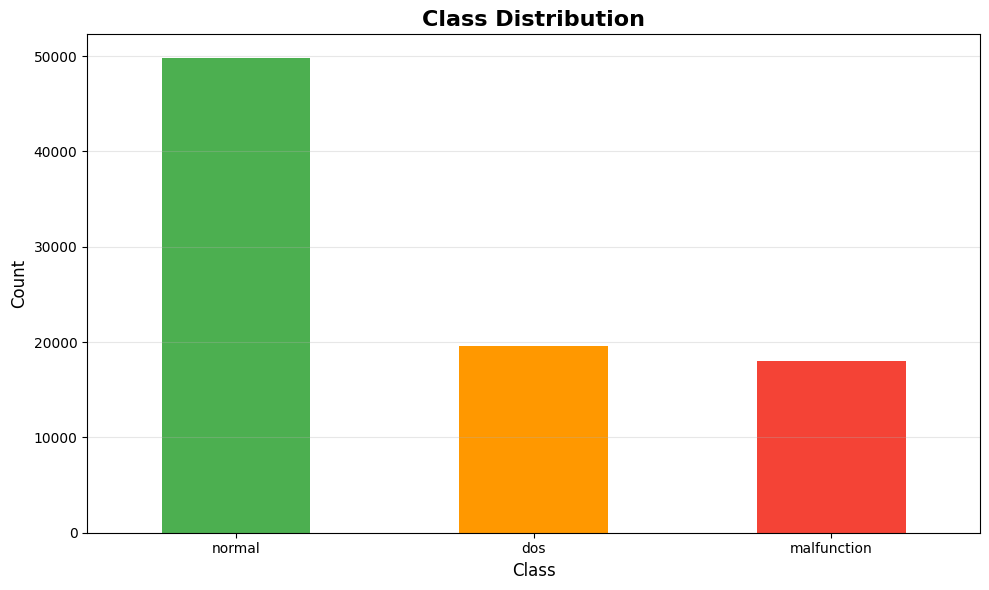

In [ ]:
print("=" * 80)
print("DATA EXPLORATION SUMMARY")
print("=" * 80)

print(f"\n📐 Dataset Dimensions: {combined_df.shape[0]} rows × {combined_df.shape[1]} columns")

print("\n📊 Data Types:")
print(combined_df.dtypes.value_counts())

print("\n🔍 First 5 rows:")
display(combined_df.head())

print("\n📈 Basic Statistics:")
display(combined_df.describe())

print("\n🎯 Target Variable Distribution:")
label_counts = combined_df['label'].value_counts()
print(label_counts)

# Plot class distribution
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#FF9800', '#F44336']  # Green, Orange, Red
label_counts.plot(kind='bar', color=colors)
plt.title('Class Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

MISSING DATA ANALYSIS

🔍 Total missing values: 6,043,036
📊 Columns with missing values: 72

📉 Top 20 columns with highest missing percentage:


,missing_count,missing_percentage
CPU_Percent,87235,99.791803
CPU_Time,87235,99.791803
RAM_Time,86864,99.367400
RSSI_Quality,87332,99.902765
RSSI_Signal,87332,99.902765
RSSI_Time,87332,99.902765
S.No,0,0.000000
Used_RAM_MB,86864,99.367400
battery_Time,83068,95.024995
battery_current,83068,95.024995


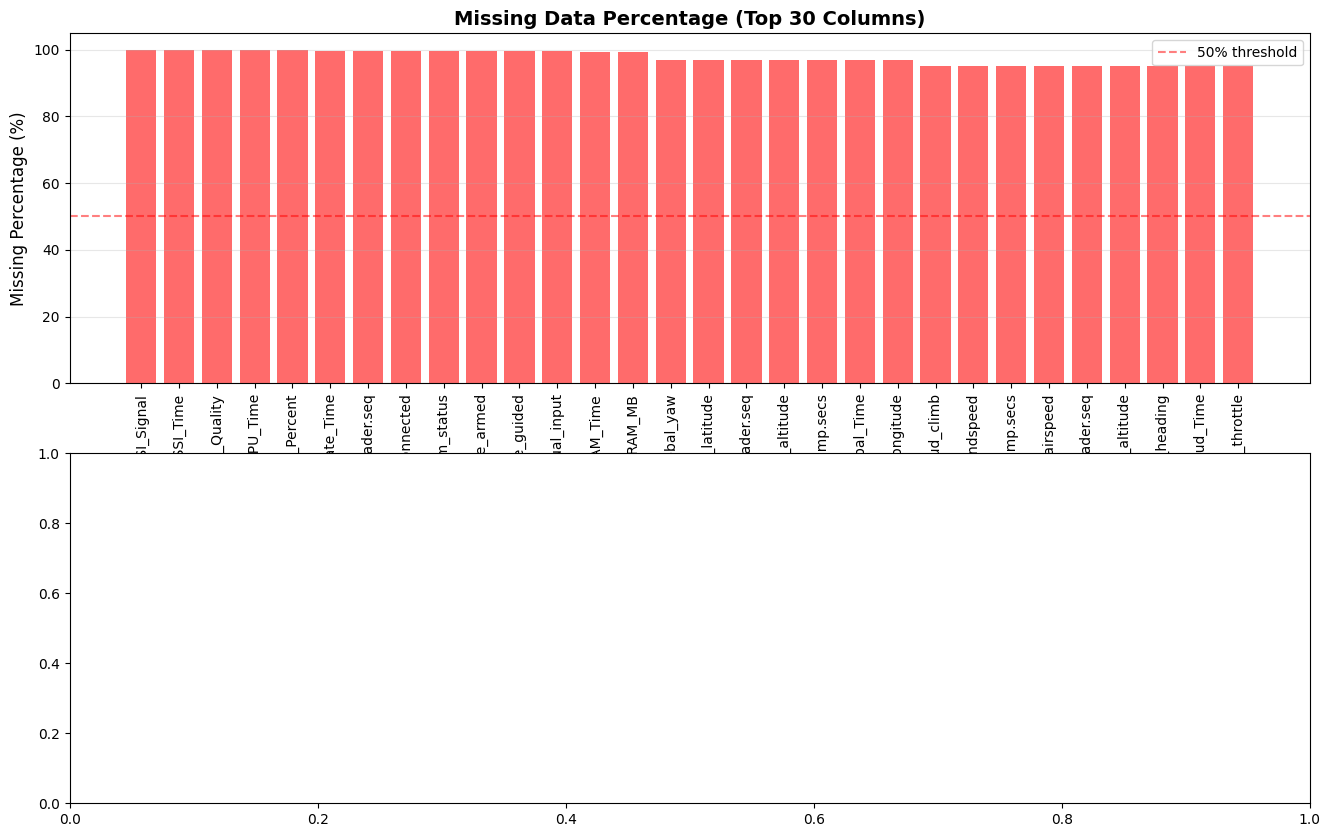

In [ ]:
print("=" * 80)
print("MISSING DATA ANALYSIS")
print("=" * 80)

# Calculate missing values
missing_stats = combined_df.isnull().sum()
missing_percentage = (missing_stats / len(combined_df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'missing_count': missing_stats,
    'missing_percentage': missing_percentage
})

print(f"\n🔍 Total missing values: {missing_stats.sum():,}")
print(f"📊 Columns with missing values: {len(missing_df[missing_df['missing_count'] > 0])}")

# Display top 20 columns with most missing data
print("\n📉 Top 20 columns with highest missing percentage:")
display(missing_df.head(20))

# Visualize missing data
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Bar chart of missing percentages
top_missing = missing_percentage.head(30)
colors = ['#FF6B6B' if pct > 50 else '#4ECDC4' for pct in top_missing]
axes[0].bar(range(len(top_missing)), top_missing.values, color=colors)
axes[0].set_title('Missing Data Percentage (Top 30 Columns)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Columns', fontsize=12)
axes[0].set_ylabel('Missing Percentage (%)', fontsize=12)
axes[0].set_xticks(range(len(top_missing)))
axes[0].set_xticklabels(top_missing.index, rotation=90, fontsize=10)
axes[0].axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Missing data heatmap (sampled for performance)
sample_size = min(1000, len(combined_df))
missing_matrix = combined_df.iloc[:sample_size].isnull()


In [ ]:
# Select columns with some missing data
cols_with_missing = missing_matrix.columns[missing_matrix.any()].tolist()[:40]

if cols_with_missing:
    sns.heatmap(missing_matrix[cols_with_missing].T,
                cbar_kws={'label': 'Missing Data'},
                cmap=['#4ECDC4', '#FF6B6B'],  # Green = present, Red = missing
                ax=axes[1])
    axes[1].set_title('Missing Data Pattern (Sample: First 1000 Rows)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Row Index', fontsize=12)
    axes[1].set_ylabel('Columns', fontsize=12)

plt.tight_layout()
plt.show()

# Categorize columns by missing percentage
def categorize_missing_columns(missing_df, thresholds=[5, 30, 70]):
    """Categorize columns based on missing data percentage"""

    categories = {}
    for col, pct in missing_df['missing_percentage'].items():
        if pct == 0:
            categories[col] = {'category': 'complete', 'strategy': 'keep'}
        elif pct < thresholds[0]:
            categories[col] = {'category': 'low_missing', 'strategy': 'impute_advanced'}
        elif pct < thresholds[1]:
            categories[col] = {'category': 'medium_missing', 'strategy': 'impute_simple'}
        elif pct < thresholds[2]:
            categories[col] = {'category': 'high_missing', 'strategy': 'impute_const'}
        else:
            categories[col] = {'category': 'very_high_missing', 'strategy': 'drop'}

    return pd.DataFrame(categories).T

categories_df = categorize_missing_columns(missing_df)
print("\n📋 Missing Data Handling Strategy:")
print(categories_df['strategy'].value_counts())


<Figure size 640x480 with 0 Axes>


📋 Missing Data Handling Strategy:
strategy
drop    72
keep     9
Name: count, dtype: int64


OUTLIER DETECTION AND TREATMENT


Detecting outliers:   0%|          | 0/78 [00:00<?, ?it/s]


📊 Outlier statistics for 68 numerical columns
🔍 Columns with >5% outliers (IQR method): 20
🔍 Columns with >5% outliers (Z-score method): 1

📈 Top 10 columns with most outliers (IQR method):


,outlier_pct_iqr,outlier_pct_z,mean,std
global_position-local_twist.twist.linear.y,29.704064,2.473498,0.019658,0.829804
global_position-local_twist.twist.linear.x,28.688163,2.826855,-0.024353,0.754903
imu-data_angular_velocity.z,27.680355,0.377358,0.029762,0.499099
vfr_hud_throttle,19.500347,0.000000,0.167222,0.087402
rc-out_channels_2,19.401963,0.000000,1553.359279,284.613435
rc-out_channels_3,19.379137,0.000000,1552.233280,281.854328
global_position-local_twist.twist.linear.z,18.926678,1.656360,-0.018626,0.389780
rc-out_channels_0,18.785665,0.000000,1419.499429,221.196651
Used_RAM_MB,18.625678,0.723327,10.234720,10.221969
vfr_hud_climb,17.325931,1.572982,0.019144,0.401979


Skipping plot for 'battery_percentage' as no outlier statistics were generated (e.g., all non-null values might be identical).


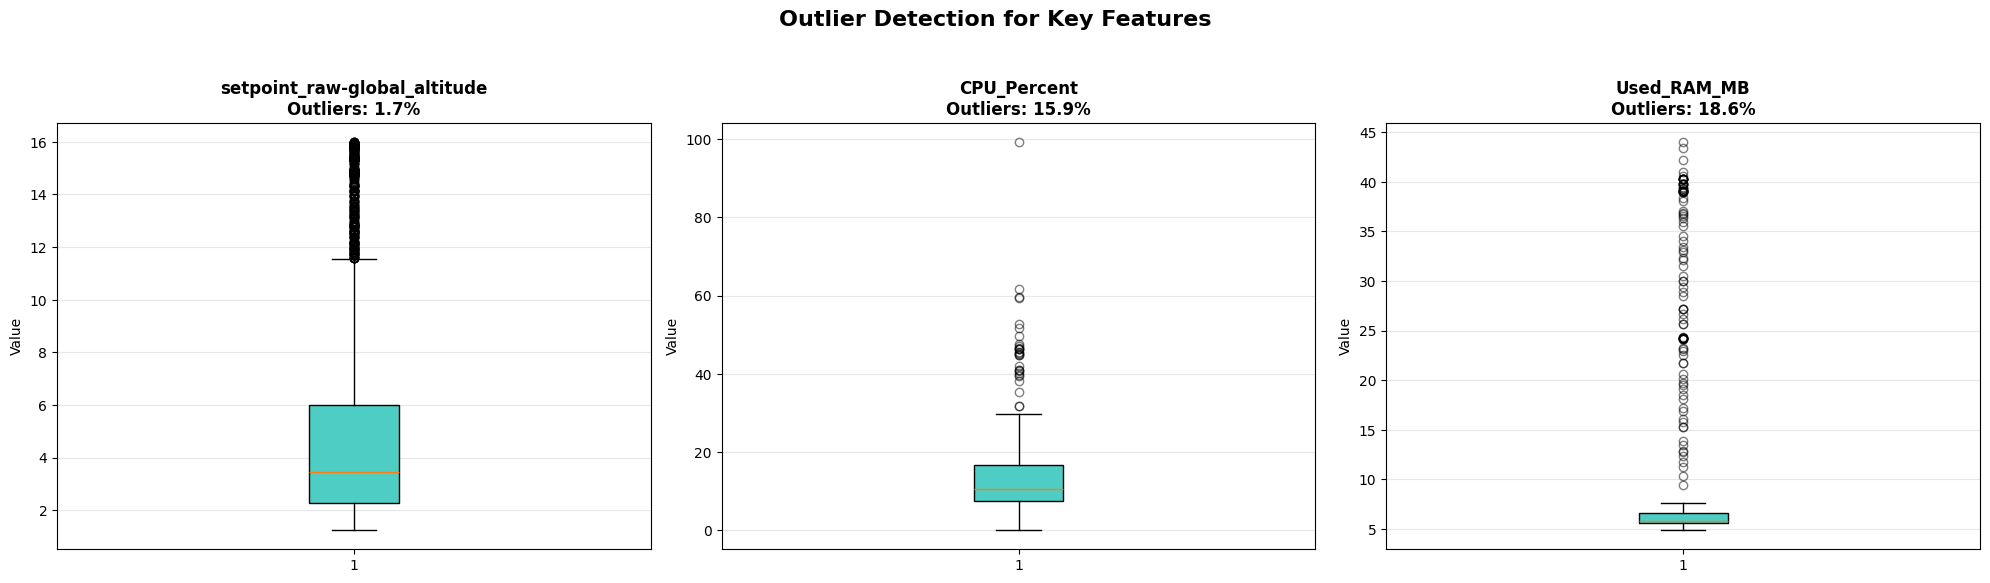

In [ ]:
print("=" * 80)
print("OUTLIER DETECTION AND TREATMENT")
print("=" * 80)

from scipy import stats
from tqdm.notebook import tqdm # Use tqdm.notebook for Colab progress bars

def detect_outliers_iqr(df, numerical_cols=None, threshold=1.5):
    """Detect outliers using IQR method"""

    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove non-numerical columns
    numerical_cols = [col for col in numerical_cols
                      if col not in ['S.No', 'label', 'dataset_source']]

    outlier_stats = {}

    for col in tqdm(numerical_cols, desc="Detecting outliers"):
        if df[col].notna().sum() > 0:
            data = df[col].dropna()

            # IQR method
            Q1 = np.percentile(data, 25)
            Q3 = np.percentile(data, 75)
            IQR = Q3 - Q1

            if IQR > 0:  # Only calculate stats if there's variation
                lower_bound = Q1 - threshold * IQR
                upper_bound = Q3 + threshold * IQR

                outliers = data[(data < lower_bound) | (data > upper_bound)]
                outlier_pct = (len(outliers) / len(data)) * 100

                # Z-score method
                # Avoid Z-score if all values are the same (std=0)
                if data.std() > 0:
                    z_scores = np.abs(stats.zscore(data))
                    z_outliers = data[z_scores > 3]
                    z_outlier_pct = (len(z_outliers) / len(data)) * 100
                else:
                    z_outliers = []
                    z_outlier_pct = 0.0

                outlier_stats[col] = {
                    'q1': Q1,
                    'q3': Q3,
                    'iqr': IQR,
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'outlier_count_iqr': len(outliers),
                    'outlier_pct_iqr': outlier_pct,
                    'outlier_count_z': len(z_outliers),
                    'outlier_pct_z': z_outlier_pct,
                    'min': data.min(),
                    'max': data.max(),
                    'mean': data.mean(),
                    'std': data.std()
                }

    return pd.DataFrame(outlier_stats).T

# Detect outliers
outlier_stats_df = detect_outliers_iqr(combined_df)

print(f"\n📊 Outlier statistics for {len(outlier_stats_df)} numerical columns")
print(f"🔍 Columns with >5% outliers (IQR method): {len(outlier_stats_df[outlier_stats_df['outlier_pct_iqr'] > 5])}")
print(f"🔍 Columns with >5% outliers (Z-score method): {len(outlier_stats_df[outlier_stats_df['outlier_pct_z'] > 5])}")

# Display columns with most outliers
top_outlier_cols = outlier_stats_df.sort_values('outlier_pct_iqr', ascending=False).head(10)
print("\n📈 Top 10 columns with most outliers (IQR method):")
display(top_outlier_cols[['outlier_pct_iqr', 'outlier_pct_z', 'mean', 'std']])

# Visualize outliers for key features
def visualize_outliers(df, columns, n_cols=3):
    """Create box plots to visualize outliers"""

    n_plots = len(columns)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    axes = axes.flatten() if n_plots > 1 else [axes]

    plot_idx = 0
    for col in columns:
        if col in outlier_stats_df.index and plot_idx < len(axes): # Check if column has outlier stats
            ax = axes[plot_idx]

            # Box plot
            data = df[col].dropna()
            if not data.empty: # Ensure there is data to plot
                bp = ax.boxplot(data, vert=True, patch_artist=True)

                # Color outliers
                bp['boxes'][0].set_facecolor('#4ECDC4')
                bp['fliers'][0].set(marker='o', color='#FF6B6B', alpha=0.5)

                ax.set_title(f'{col}\nOutliers: {outlier_stats_df.loc[col, "outlier_pct_iqr"]:.1f}%',
                            fontsize=12, fontweight='bold')
                ax.set_ylabel('Value', fontsize=10)
                ax.grid(axis='y', alpha=0.3)
                plot_idx += 1
            else:
                print(f"Skipping plot for '{col}' due to no non-null data.")
        elif col not in outlier_stats_df.index:
            print(f"Skipping plot for '{col}' as no outlier statistics were generated (e.g., all non-null values might be identical).")

    # Hide unused subplots
    for idx in range(plot_idx, len(axes)):
        axes[idx].set_visible(False)

    plt.suptitle('Outlier Detection for Key Features', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

# Select key features for visualization
key_features = [
    'setpoint_raw-global_altitude',
    'battery_percentage',
    'CPU_Percent',
    'Used_RAM_MB'
]

# Filter to features that exist in dataset
existing_features = [f for f in key_features if f in combined_df.columns]
visualize_outliers(combined_df, existing_features[:9], n_cols=3)

In [ ]:
print("=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

def engineer_features(df):
    """Create new features based on drone telemetry data"""

    df_eng = df.copy()
    original_features = len(df_eng.columns)

    print(f"Original features: {original_features}")

    # 1. Extract temporal features from timestamps
    time_cols = [col for col in df.columns if 'Time' in col and col != 'label' and col != 'dataset_source']

    for time_col in time_cols[:3]:  # Process first 3 time columns
        if time_col in df.columns and df[time_col].notna().any():
            try:
                # Convert Unix timestamp to datetime
                df_eng[f'{time_col}_datetime'] = pd.to_datetime(df_eng[time_col], unit='s', errors='coerce')

                # Extract time components
                df_eng[f'{time_col}_hour'] = df_eng[f'{time_col}_datetime'].dt.hour
                df_eng[f'{time_col}_minute'] = df_eng[f'{time_col}_datetime'].dt.minute
                df_eng[f'{time_col}_second'] = df_eng[f'{time_col}_datetime'].dt.second

                # Calculate time differences
                if len(df_eng) > 1:
                    df_eng[f'{time_col}_diff'] = df_eng[time_col].diff()

            except Exception as e:
                print(f"⚠️ Could not process {time_col}: {e}")

    # 2. Create battery health indicators
    battery_features = ['battery_voltage', 'battery_current', 'battery_temperature', 'battery_percentage']
    existing_battery = [f for f in battery_features if f in df.columns]

    if 'battery_voltage' in existing_battery and 'battery_current' in existing_battery:
        df_eng['battery_power'] = df_eng['battery_voltage'] * df_eng['battery_current']

    if 'battery_temperature' in existing_battery:
        df_eng['battery_temp_norm'] = (df_eng['battery_temperature'] - df_eng['battery_temperature'].min()) / \
                                     (df_eng['battery_temperature'].max() - df_eng['battery_temperature'].min())

    # 3. Create IMU derived features
    imu_features = ['imu-data_angular_velocity.x', 'imu-data_angular_velocity.y', 'imu-data_angular_velocity.z']
    existing_imu = [f for f in imu_features if f in df.columns]

    if len(existing_imu) >= 2:
        # Calculate angular velocity magnitude
        squares_sum = sum(df_eng[f]**2 for f in existing_imu)
        df_eng['angular_velocity_magnitude'] = np.sqrt(squares_sum)

    # 4. Position stability metrics
    pos_cols = [col for col in df.columns if 'position' in col.lower() or 'altitude' in col.lower()]
    for col in pos_cols[:3]:  # First 3 position columns
        if col in df.columns and df[col].notna().sum() > 100:
            df_eng[f'{col}_rolling_mean'] = df_eng[col].rolling(window=10, min_periods=1).mean()
            df_eng[f'{col}_rolling_std'] = df_eng[col].rolling(window=10, min_periods=1).std()

    # 5. System health composite score
    system_features = ['CPU_Percent', 'Used_RAM_MB']
    existing_system = [f for f in system_features if f in df.columns]

    if len(existing_system) >= 2:
        # Normalize features
        cpu_norm = (df_eng['CPU_Percent'] - df_eng['CPU_Percent'].min()) / \
                  (df_eng['CPU_Percent'].max() - df_eng['CPU_Percent'].min())
        ram_norm = (df_eng['Used_RAM_MB'] - df_eng['Used_RAM_MB'].min()) / \
                  (df_eng['Used_RAM_MB'].max() - df_eng['Used_RAM_MB'].min())

        df_eng['system_load_index'] = 0.6 * cpu_norm + 0.4 * ram_norm

    # 6. Signal quality indicators
    if 'RSSI_Signal' in df.columns:
        df_eng['signal_strength'] = (df_eng['RSSI_Signal'] + 100) / 100  # Convert to 0-1 scale

    # 7. Flight mode indicators (from state columns)
    state_cols = [col for col in df.columns if 'state_' in col and col not in ['state_Time', 'state_header.seq']]
    if state_cols:
        df_eng['state_sum'] = df_eng[state_cols].sum(axis=1, skipna=True)

    new_features = len(df_eng.columns) - original_features
    print(f"New features created: {new_features}")
    print(f"Total features: {len(df_eng.columns)}")

    return df_eng

# Apply feature engineering
combined_df_eng = engineer_features(combined_df)

print("\n✅ Feature engineering complete!")
print(f"Original shape: {combined_df.shape}")
print(f"New shape: {combined_df_eng.shape}")

# Display some new features
new_feature_cols = [col for col in combined_df_eng.columns if col not in combined_df.columns]
print(f"\n📋 New features created ({len(new_feature_cols)}):")
for i, col in enumerate(new_feature_cols[:20]):  # Show first 20
    print(f"  {i+1:2d}. {col}")


FEATURE ENGINEERING
Original features: 81
New features created: 27
Total features: 108

✅ Feature engineering complete!
Original shape: (87417, 81)
New shape: (87417, 108)

📋 New features created (27):
   1. setpoint_raw-global_Time_datetime
   2. setpoint_raw-global_Time_hour
   3. setpoint_raw-global_Time_minute
   4. setpoint_raw-global_Time_second
   5. setpoint_raw-global_Time_diff
   6. battery_Time_datetime
   7. battery_Time_hour
   8. battery_Time_minute
   9. battery_Time_second
  10. battery_Time_diff
  11. global_position-local_Time_datetime
  12. global_position-local_Time_hour
  13. global_position-local_Time_minute
  14. global_position-local_Time_second
  15. global_position-local_Time_diff
  16. battery_power
  17. battery_temp_norm
  18. angular_velocity_magnitude
  19. setpoint_raw-global_altitude_rolling_mean
  20. setpoint_raw-global_altitude_rolling_std


DATA SCALING STRATEGY

📊 Scaling Strategy Distribution:
strategy
standard    30
robust      16
minmax       4
Name: count, dtype: int64


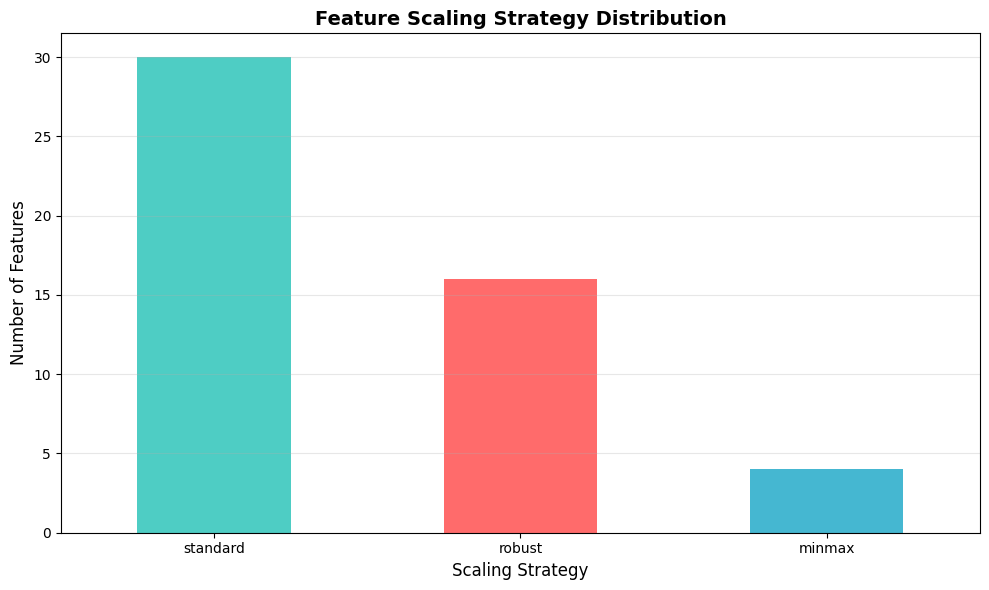


📋 Scaling strategy explanation:
  • Robust: For features with >5% outliers (uses median and IQR)
  • Standard: For normally distributed features (mean=0, std=1)
  • MinMax: For features with known bounds (scales to [0,1] or [-1,1])


In [ ]:
print("=" * 80)
print("DATA SCALING STRATEGY")
print("=" * 80)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def analyze_feature_distributions(df, label_col='label'):
    """Analyze feature distributions to determine scaling strategy"""

    # Separate features
    X = df.drop(columns=[label_col, 'dataset_source'], errors='ignore')
    if 'S.No' in X.columns:
        X = X.drop(columns=['S.No'])

    numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

    scaling_strategy = {}

    for col in numerical_cols[:50]:  # Analyze first 50 columns
        data = X[col].dropna()
        if len(data) > 0:
            # Calculate statistics
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            mean = np.mean(data)
            std = np.std(data)
            min_val = np.min(data)
            max_val = np.max(data)

            # Check for outliers
            outlier_ratio = len(data[(data < (q1 - 1.5*iqr)) | (data > (q3 + 1.5*iqr))]) / len(data)

            # Determine scaling strategy
            if outlier_ratio > 0.05:  # More than 5% outliers
                strategy = 'robust'
            elif min_val >= 0 and max_val <= 1:  # Already normalized
                strategy = 'minmax'  # or keep as is
            elif np.abs(mean) > 10 * std:  # Large mean compared to std
                strategy = 'standard'
            else:
                strategy = 'standard'

            scaling_strategy[col] = {
                'strategy': strategy,
                'mean': mean,
                'std': std,
                'min': min_val,
                'max': max_val,
                'outlier_ratio': outlier_ratio
            }

    return pd.DataFrame(scaling_strategy).T

# Analyze feature distributions
scaling_analysis = analyze_feature_distributions(combined_df_eng)

print("\n📊 Scaling Strategy Distribution:")
strategy_counts = scaling_analysis['strategy'].value_counts()
print(strategy_counts)

# Visualize scaling strategy
plt.figure(figsize=(10, 6))
colors = {'robust': '#FF6B6B', 'standard': '#4ECDC4', 'minmax': '#45B7D1'}
strategy_colors = [colors.get(s, '#95A5A6') for s in strategy_counts.index]

strategy_counts.plot(kind='bar', color=strategy_colors)
plt.title('Feature Scaling Strategy Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Scaling Strategy', fontsize=12)
plt.ylabel('Number of Features', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📋 Scaling strategy explanation:")
print("  • Robust: For features with >5% outliers (uses median and IQR)")
print("  • Standard: For normally distributed features (mean=0, std=1)")
print("  • MinMax: For features with known bounds (scales to [0,1] or [-1,1])")


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

def handle_missing_values(df, label_col='label', dataset_source_col='dataset_source'):
    """Handle missing values based on missing percentage"""

    df_clean = df.copy()

    # Separate features and labels
    y = df_clean[label_col]
    source = df_clean[dataset_source_col] if dataset_source_col in df_clean.columns else None

    X = df_clean.drop(columns=[label_col, dataset_source_col], errors='ignore')

    if 'S.No' in X.columns:
        X = X.drop(columns=['S.No'])

    print(f"🔧 Handling missing values for {X.shape[1]} features...")

    # Calculate missing percentages
    missing_pct = X.isnull().mean()

    # Categorize columns
    cols_complete = missing_pct[missing_pct == 0].index.tolist()
    cols_low_missing = missing_pct[(missing_pct > 0) & (missing_pct < 0.05)].index.tolist()
    cols_medium_missing = missing_pct[(missing_pct >= 0.05) & (missing_pct < 0.3)].index.tolist()
    cols_high_missing = missing_pct[(missing_pct >= 0.3) & (missing_pct < 0.7)].index.tolist()
    cols_very_high_missing = missing_pct[missing_pct >= 0.7].index.tolist()

    print(f"  • Complete columns: {len(cols_complete)}")
    print(f"  • Low missing (<5%): {len(cols_low_missing)}")
    print(f"  • Medium missing (5-30%): {len(cols_medium_missing)}")
    print(f"  • High missing (30-70%): {len(cols_high_missing)}")
    print(f"  • Very high missing (≥70%): {len(cols_very_high_missing)}")

    # Imputation strategies
    X_imputed = X.copy()

    # 1. For low missing: use KNN imputation
    if cols_low_missing:
        print(f"  • Applying KNN imputation to {len(cols_low_missing)} columns...")
        knn_imputer = KNNImputer(n_neighbors=5)
        X_imputed[cols_low_missing] = knn_imputer.fit_transform(X[cols_low_missing])

    # 2. For medium missing: use median imputation
    if cols_medium_missing:
        print(f"  • Applying median imputation to {len(cols_medium_missing)} columns...")
        median_imputer = SimpleImputer(strategy='median')
        X_imputed[cols_medium_missing] = median_imputer.fit_transform(X[cols_medium_missing])

    # 3. For high missing: use constant 0
    if cols_high_missing:
        print(f"  • Filling with 0: {len(cols_high_missing)} columns...")
        X_imputed[cols_high_missing] = X[cols_high_missing].fillna(0)

    # 4. For very high missing: consider dropping or keeping with 0
    if cols_very_high_missing:
        print(f"  • Columns with ≥70% missing: {len(cols_very_high_missing)}")
        print(f"    These columns will be dropped from analysis")
        X_imputed = X_imputed.drop(columns=cols_very_high_missing)

    # Combine back with labels
    result_df = X_imputed.copy()
    result_df[label_col] = y.values

    if source is not None:
        result_df[dataset_source_col] = source.values

    print(f"\n✅ Missing values handled. Remaining missing: {result_df.isnull().sum().sum()}")

    return result_df

# Handle missing values
combined_df_clean = handle_missing_values(combined_df_eng)

🔧 Handling missing values for 105 features...
  • Complete columns: 12
  • Low missing (<5%): 2
  • Medium missing (5-30%): 0
  • High missing (30-70%): 2
  • Very high missing (≥70%): 89
  • Applying KNN imputation to 2 columns...
  • Filling with 0: 2 columns...
  • Columns with ≥70% missing: 89
    These columns will be dropped from analysis

✅ Missing values handled. Remaining missing: 0


FEATURE CORRELATION ANALYSIS
Analyzing correlations for 15 numeric features...

📊 Found 7 feature pairs with correlation > 0.9
📊 Created 2 correlation groups

🔗 Correlation groups (features to consider removing one from each group):
  Group 1: setpoint_raw-global_Time_hour, setpoint_raw-global_longitude, setpoint_raw-global_Time, setpoint_raw-global_latitude
  Group 2: setpoint_raw-global_altitude, setpoint_raw-global_altitude_rolling_mean


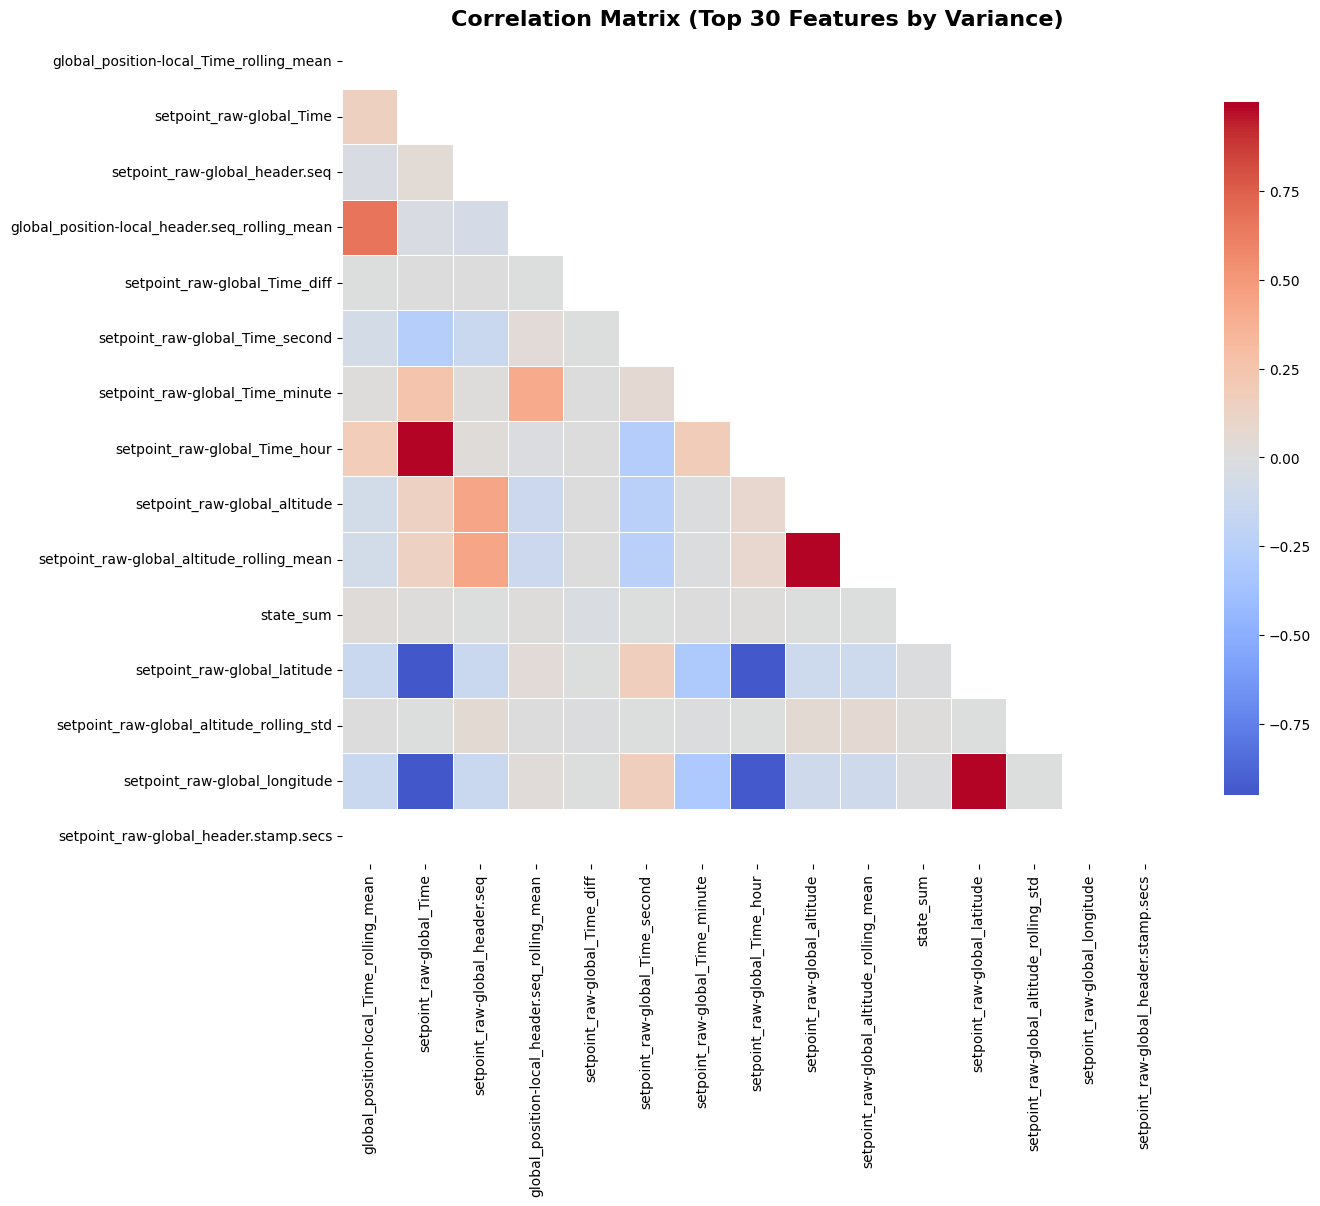

In [ ]:
print("=" * 80)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 80)

def analyze_correlations(df, label_col='label', threshold=0.95):
    """Analyze feature correlations and identify highly correlated features"""

    # Separate features and label
    X = df.drop(columns=[label_col], errors='ignore')

    # Remove non-numeric columns
    X_numeric = X.select_dtypes(include=[np.number])

    print(f"Analyzing correlations for {X_numeric.shape[1]} numeric features...")

    # Calculate correlation matrix
    corr_matrix = X_numeric.corr()

    # Find highly correlated features
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    high_corr_pairs = []

    for col in upper_tri.columns:
        high_corr = upper_tri[col][abs(upper_tri[col]) > threshold].index.tolist()
        if high_corr:
            for corr_col in high_corr:
                correlation = upper_tri.loc[corr_col, col]
                high_corr_pairs.append({
                    'feature1': col,
                    'feature2': corr_col,
                    'correlation': correlation
                })

    # Create correlation groups
    correlation_groups = {}
    for pair in high_corr_pairs:
        f1, f2 = pair['feature1'], pair['feature2']

        # Check if either feature is already in a group
        found = False
        for group in correlation_groups.values():
            if f1 in group or f2 in group:
                group.update([f1, f2])
                found = True
                break

        if not found:
            group_id = len(correlation_groups)
            correlation_groups[group_id] = set([f1, f2])

    # Convert sets to lists
    correlation_groups = {k: list(v) for k, v in correlation_groups.items()}

    print(f"\n📊 Found {len(high_corr_pairs)} feature pairs with correlation > {threshold}")
    print(f"📊 Created {len(correlation_groups)} correlation groups")

    # Display correlation groups
    if correlation_groups:
        print("\n🔗 Correlation groups (features to consider removing one from each group):")
        for i, (group_id, features) in enumerate(correlation_groups.items()):
            if i < 10:  # Show first 10 groups
                print(f"  Group {group_id+1}: {', '.join(features[:5])}{'...' if len(features) > 5 else ''}")

    return corr_matrix, high_corr_pairs, correlation_groups

# Analyze correlations
corr_matrix, high_corr_pairs, correlation_groups = analyze_correlations(combined_df_clean, threshold=0.9)

# Visualize correlation matrix (top 30 features by variance)
top_features = combined_df_clean.select_dtypes(include=[np.number]).var().sort_values(ascending=False).head(30).index.tolist()

if len(top_features) > 1:
    plt.figure(figsize=(14, 12))
    corr_top = combined_df_clean[top_features].corr()

    mask = np.triu(np.ones_like(corr_top, dtype=bool))
    sns.heatmap(corr_top,
                mask=mask,
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": 0.8},
                annot=False,
                fmt='.2f')

    plt.title('Correlation Matrix (Top 30 Features by Variance)', fontsize=16, fontweight='bold')
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


In [ ]:
print("\n💾 Saving preprocessed data to CSV...")
combined_df_clean.to_csv('preprocessed_data.csv', index=False)
print("✅ Preprocessed data saved as 'preprocessed_data.csv'")


💾 Saving preprocessed data to CSV...
✅ Preprocessed data saved as 'preprocessed_data.csv'


In [3]:
import pandas as pd

combined_df_clean = pd.read_csv('combined_df_clean.csv')
print(f"Preprocessed data loaded successfully. Shape: {combined_df_clean.shape}")
display(combined_df_clean.head())

Preprocessed data loaded successfully. Shape: (87417, 18)


,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,setpoint_raw-global_Time_datetime,setpoint_raw-global_Time_hour,setpoint_raw-global_Time_minute,setpoint_raw-global_Time_second,setpoint_raw-global_Time_diff,setpoint_raw-global_altitude_rolling_mean,setpoint_raw-global_altitude_rolling_std,global_position-local_Time_rolling_mean,global_position-local_header.seq_rolling_mean,state_sum,label,dataset_source
0,1.729874e+09,351,0,33.636576,72.991521,1.25,2024-10-25 16:29:57.941646099,16,29,57,-5.354833,1.25,0.003575,1.729874e+09,8455.0,7.0,normal,NormalFlight_Normal3
1,1.729874e+09,355,0,33.636576,72.991521,1.25,2024-10-25 16:29:57.948842049,16,29,57,0.007196,1.25,0.000000,1.729874e+09,8455.0,0.0,normal,NormalFlight_Normal3
2,1.729874e+09,1648,0,33.636576,72.991521,1.25,2024-10-25 16:29:58.099756241,16,29,58,0.150914,1.25,0.000000,1.729874e+09,8455.0,0.0,normal,NormalFlight_Normal3
3,1.729874e+09,1699,0,33.636576,72.991521,1.25,2024-10-25 16:29:58.107839823,16,29,58,0.008084,1.25,0.000000,1.729874e+09,8455.0,0.0,normal,NormalFlight_Normal3
4,1.729874e+09,1826,0,33.636576,72.991521,1.25,2024-10-25 16:29:58.209521294,16,29,58,0.101681,1.25,0.000000,1.729874e+09,8455.0,0.0,normal,NormalFlight_Normal3


In [4]:
print("=" * 80)
print("DATA SPLITTING")
print("=" * 80)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

def prepare_final_dataset(df, label_col='label', test_size=0.15, val_size=0.15):
    """Prepare final dataset with train/val/test splits"""

    print("Preparing final dataset...")

    # Separate features and labels
    y = df[label_col]
    X = df.drop(columns=[label_col], errors='ignore')

    # Remove non-numeric columns for modeling
    non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_numeric_cols:
        print(f"Dropping non-numeric columns: {non_numeric_cols}")
        X = X.drop(columns=non_numeric_cols)

    # Encode labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print(f"Label encoding: {dict(zip(le.classes_, le.transform(le.classes_)))}")

    # First split: train+val vs test
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y_encoded,
        test_size=test_size,
        random_state=SEED,
        stratify=y_encoded
    )

    # Second split: train vs val
    val_ratio = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp,
        test_size=val_ratio,
        random_state=SEED,
        stratify=y_temp
    )

    print(f"\n📊 Dataset Split Summary:")
    print(f"  Total samples: {len(X):,}")
    print(f"  Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
    print(f"  Validation set: {len(X_val):,} samples ({len(X_val)/len(X)*100:.1f}%)")
    print(f"  Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

    print(f"\n🎯 Class distribution in splits:")
    for split_name, split_y in [('Training', y_train), ('Validation', y_val), ('Test', y_test)]:
        unique, counts = np.unique(split_y, return_counts=True)
        print(f"\n  {split_name}:")
        for cls, count in zip(unique, counts):
            cls_name = le.inverse_transform([cls])[0]
            print(f"    Class {cls_name}: {count:,} samples ({count/len(split_y)*100:.1f}%)")

    return X_train, X_val, X_test, y_train, y_val, y_test, le

# Prepare final dataset
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = prepare_final_dataset(combined_df_clean)

# Save feature names
feature_names = X_train.columns.tolist()
print(f"\n📋 Number of features: {len(feature_names)}")
print(f"📋 First 10 features: {feature_names[:10]}")


DATA SPLITTING
Preparing final dataset...
Dropping non-numeric columns: ['setpoint_raw-global_Time_datetime', 'dataset_source']
Label encoding: {'dos': np.int64(0), 'malfunction': np.int64(1), 'normal': np.int64(2)}

📊 Dataset Split Summary:
  Total samples: 87,417
  Training set: 61,191 samples (70.0%)
  Validation set: 13,113 samples (15.0%)
  Test set: 13,113 samples (15.0%)

🎯 Class distribution in splits:

  Training:
    Class dos: 13,711 samples (22.4%)
    Class malfunction: 12,620 samples (20.6%)
    Class normal: 34,860 samples (57.0%)

  Validation:
    Class dos: 2,938 samples (22.4%)
    Class malfunction: 2,705 samples (20.6%)
    Class normal: 7,470 samples (57.0%)

  Test:
    Class dos: 2,938 samples (22.4%)
    Class malfunction: 2,705 samples (20.6%)
    Class normal: 7,470 samples (57.0%)

📋 Number of features: 15
📋 First 10 features: ['setpoint_raw-global_Time', 'setpoint_raw-global_header.seq', 'setpoint_raw-global_header.stamp.secs', 'setpoint_raw-global_latitude

COMPREHENSIVE VISUALIZATION REPORT


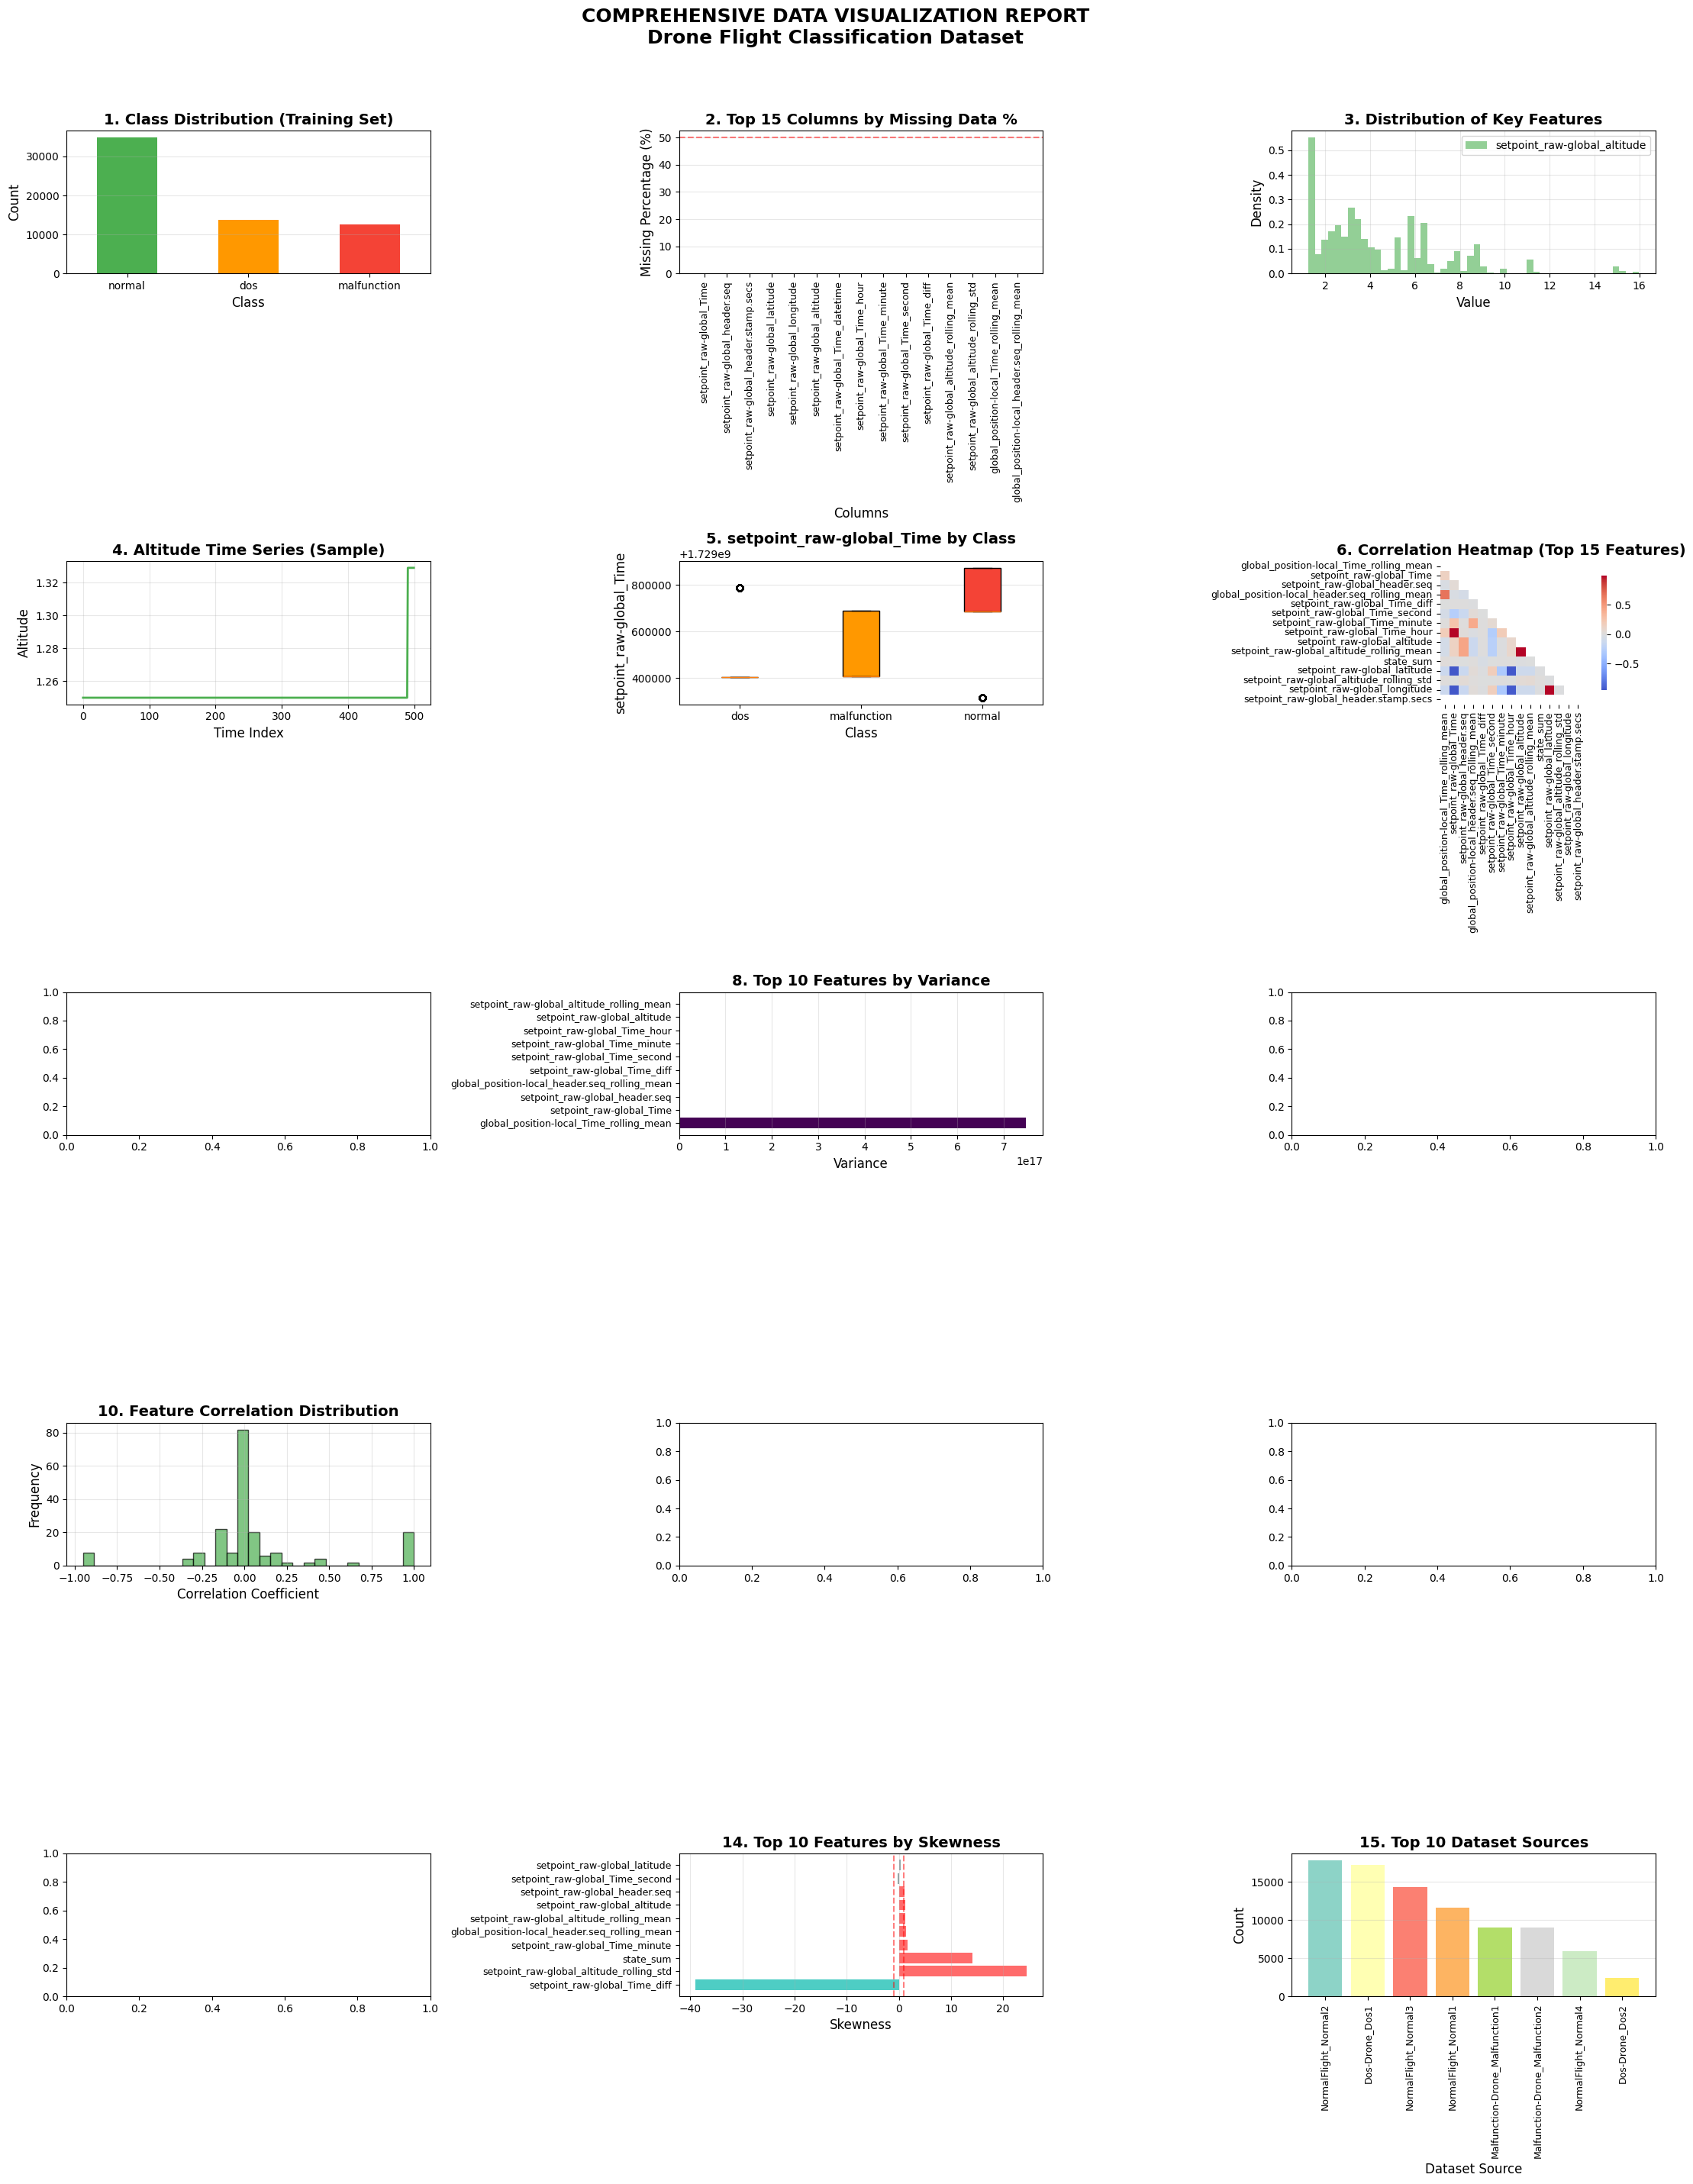

✅ Visualization report created successfully!


In [5]:
print("=" * 80)
print("COMPREHENSIVE VISUALIZATION REPORT")
print("=" * 80)

def create_visualization_report(df, X_train, y_train, label_encoder):
    """Create comprehensive visualization report"""

    fig = plt.figure(figsize=(22, 28))

    # Convert y_train back to original labels for visualization
    y_train_labels = label_encoder.inverse_transform(y_train)

    # 1. Class Distribution
    plt.subplot(5, 3, 1)
    class_counts = pd.Series(y_train_labels).value_counts()
    colors = ['#4CAF50', '#FF9800', '#F44336']
    class_counts.plot(kind='bar', color=colors[:len(class_counts)])
    plt.title('1. Class Distribution (Training Set)', fontsize=14, fontweight='bold')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)

    # 2. Missing Data Summary
    plt.subplot(5, 3, 2)
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_pct_top = missing_pct.head(15)
    colors_missing = ['#FF6B6B' if pct > 50 else '#4ECDC4' for pct in missing_pct_top]
    plt.bar(range(len(missing_pct_top)), missing_pct_top.values, color=colors_missing)
    plt.title('2. Top 15 Columns by Missing Data %', fontsize=14, fontweight='bold')
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Missing Percentage (%)', fontsize=12)
    plt.xticks(range(len(missing_pct_top)), missing_pct_top.index, rotation=90, fontsize=9)
    plt.axhline(y=50, color='red', linestyle='--', alpha=0.5)
    plt.grid(axis='y', alpha=0.3)

    # 3. Distribution of Key Numerical Features
    plt.subplot(5, 3, 3)
    key_features = ['setpoint_raw-global_altitude', 'battery_percentage',
                    'CPU_Percent', 'Used_RAM_MB']
    existing_features = [f for f in key_features if f in df.columns]

    for i, feature in enumerate(existing_features):
        if feature in df.columns:
            data = df[feature].dropna()
            if len(data) > 0:
                plt.hist(data, bins=50, alpha=0.6, label=feature,
                        density=True, color=colors[i % len(colors)])

    plt.title('3. Distribution of Key Features', fontsize=14, fontweight='bold')
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)

    # 4. Time Series Plot (if available)
    plt.subplot(5, 3, 4)
    time_cols = [col for col in df.columns if 'Time' in col and 'datetime' not in col]
    if time_cols and 'setpoint_raw-global_altitude' in df.columns:
        sample_idx = min(500, len(df))
        time_data = df[time_cols[0]].iloc[:sample_idx]
        altitude_data = df['setpoint_raw-global_altitude'].iloc[:sample_idx]

        if not time_data.empty and not altitude_data.empty:
            plt.plot(range(len(time_data)), altitude_data.values, color='#4CAF50', linewidth=2)
            plt.title('4. Altitude Time Series (Sample)', fontsize=14, fontweight='bold')
            plt.xlabel('Time Index', fontsize=12)
            plt.ylabel('Altitude', fontsize=12)
            plt.grid(alpha=0.3)

    # 5. Box Plots by Class
    plt.subplot(5, 3, 5)
    feature_to_plot = 'battery_percentage' if 'battery_percentage' in df.columns else df.select_dtypes(include=[np.number]).columns[0]

    if feature_to_plot in df.columns:
        plot_data = []
        labels = []

        for cls in np.unique(y_train):
            cls_name = label_encoder.inverse_transform([cls])[0]
            idx = y_train_labels == cls_name
            if idx.sum() > 0:
                data = X_train.loc[idx, feature_to_plot].dropna()
                if len(data) > 0:
                    plot_data.append(data)
                    labels.append(cls_name)

        if plot_data:
            bp = plt.boxplot(plot_data, labels=labels, patch_artist=True)
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)

            plt.title(f'5. {feature_to_plot} by Class', fontsize=14, fontweight='bold')
            plt.xlabel('Class', fontsize=12)
            plt.ylabel(feature_to_plot, fontsize=12)
            plt.grid(axis='y', alpha=0.3)

    # 6. Correlation Heatmap
    plt.subplot(5, 3, 6)
    # Select top 15 features by variance
    variances = X_train.var().sort_values(ascending=False)
    top_corr_features = variances.head(15).index.tolist()

    if len(top_corr_features) > 1:
        corr_data = X_train[top_corr_features].corr()
        mask = np.triu(np.ones_like(corr_data, dtype=bool))

        sns.heatmap(corr_data, mask=mask, cmap='coolwarm', center=0,
                   square=True, cbar_kws={"shrink": 0.8}, annot=False,
                   ax=plt.gca())
        plt.title('6. Correlation Heatmap (Top 15 Features)', fontsize=14, fontweight='bold')
        plt.xticks(rotation=90, fontsize=9)
        plt.yticks(rotation=0, fontsize=9)

    # 7. Pair Plot (Scatter Matrix)
    plt.subplot(5, 3, 7)
    pair_features = ['setpoint_raw-global_altitude', 'battery_percentage',
                     'CPU_Percent', 'Used_RAM_MB']
    pair_features = [f for f in pair_features if f in X_train.columns]

    if len(pair_features) >= 2:
        # Sample for performance
        sample_idx = np.random.choice(len(X_train), size=min(500, len(X_train)), replace=False)
        x_data = X_train.iloc[sample_idx][pair_features[0]]
        y_data = X_train.iloc[sample_idx][pair_features[1]]

        # Color by class
        scatter_colors = [colors[label_encoder.transform([l])[0] % len(colors)]
                         for l in y_train_labels[sample_idx]]

        plt.scatter(x_data, y_data, c=scatter_colors, alpha=0.6, s=30)
        plt.title(f'7. {pair_features[0]} vs {pair_features[1]}', fontsize=14, fontweight='bold')
        plt.xlabel(pair_features[0], fontsize=12)
        plt.ylabel(pair_features[1], fontsize=12)
        plt.grid(alpha=0.3)

        # Create legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=colors[i], label=label_encoder.classes_[i])
                          for i in range(len(label_encoder.classes_))]
        plt.legend(handles=legend_elements, fontsize=9)

    # 8. Feature Importance (Variance)
    plt.subplot(5, 3, 8)
    top_var_features = variances.head(10)
    colors_var = plt.cm.viridis(np.linspace(0, 1, len(top_var_features)))
    plt.barh(range(len(top_var_features)), top_var_features.values, color=colors_var)
    plt.title('8. Top 10 Features by Variance', fontsize=14, fontweight='bold')
    plt.xlabel('Variance', fontsize=12)
    plt.yticks(range(len(top_var_features)), top_var_features.index, fontsize=9)
    plt.grid(axis='x', alpha=0.3)

    # 9. Outlier Visualization
    plt.subplot(5, 3, 9)
    if 'CPU_Percent' in X_train.columns:
        cpu_data = X_train['CPU_Percent'].dropna()
        if len(cpu_data) > 0:
            plt.boxplot(cpu_data, patch_artist=True)
            plt.gca().patches[0].set_facecolor('#4ECDC4')
            plt.title('9. CPU Usage Outliers', fontsize=14, fontweight='bold')
            plt.ylabel('CPU Percentage', fontsize=12)
            plt.grid(axis='y', alpha=0.3)

    # 10. Feature Correlation Distribution
    plt.subplot(5, 3, 10)
    if len(top_corr_features) > 1:
        corr_values = corr_data.values.flatten()
        corr_values = corr_values[~np.isnan(corr_values)]

        plt.hist(corr_values, bins=30, edgecolor='black', alpha=0.7, color='#4CAF50')
        plt.title('10. Feature Correlation Distribution', fontsize=14, fontweight='bold')
        plt.xlabel('Correlation Coefficient', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(alpha=0.3)

    # 11. System Metrics Relationship
    plt.subplot(5, 3, 11)
    system_features = ['CPU_Percent', 'Used_RAM_MB']
    system_features = [f for f in system_features if f in X_train.columns]

    if len(system_features) >= 2:
        sample_idx = np.random.choice(len(X_train), size=min(300, len(X_train)), replace=False)
        x_sys = X_train.iloc[sample_idx][system_features[0]]
        y_sys = X_train.iloc[sample_idx][system_features[1]]

        # Color by class
        sys_colors = [colors[label_encoder.transform([l])[0] % len(colors)]
                     for l in y_train_labels[sample_idx]]

        plt.scatter(x_sys, y_sys, c=sys_colors, alpha=0.6, s=30)
        plt.title(f'11. {system_features[0]} vs {system_features[1]}', fontsize=14, fontweight='bold')
        plt.xlabel(system_features[0], fontsize=12)
        plt.ylabel(system_features[1], fontsize=12)
        plt.grid(alpha=0.3)

    # 12. Data Completeness Timeline
    plt.subplot(5, 3, 12)
    if 'S.No' in df.columns:
        completeness = []
        window_size = 100
        for i in range(0, len(df), window_size):
            window = df.iloc[i:i+window_size]
            completeness.append(window.notna().mean().mean())

        plt.plot(completeness, color='#FF9800', linewidth=2)
        plt.title('12. Data Completeness Over Time', fontsize=14, fontweight='bold')
        plt.xlabel('Time Window', fontsize=12)
        plt.ylabel('Completeness Ratio', fontsize=12)
        plt.ylim(0, 1)
        plt.grid(alpha=0.3)

    # 13. Distribution of All Classes for Key Feature
    plt.subplot(5, 3, 13)
    if 'battery_percentage' in X_train.columns:
        for cls in np.unique(y_train):
            cls_name = label_encoder.inverse_transform([cls])[0]
            idx = y_train_labels == cls_name
            if idx.sum() > 0:
                data = X_train.loc[idx, 'battery_percentage'].dropna()
                if len(data) > 0:
                    plt.hist(data, bins=30, alpha=0.5, label=cls_name,
                            density=True, color=colors[cls % len(colors)])

        plt.title('13. Battery % Distribution by Class', fontsize=14, fontweight='bold')
        plt.xlabel('Battery Percentage', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(alpha=0.3)

    # 14. Feature Skewness
    plt.subplot(5, 3, 14)
    from scipy.stats import skew

    skewness = {}
    for col in X_train.columns[:20]:  # First 20 features
        data = X_train[col].dropna()
        if len(data) > 0:
            skewness[col] = skew(data)

    if skewness:
        top_skew = pd.Series(skewness).sort_values(key=abs, ascending=False).head(10)
        colors_skew = ['#FF6B6B' if s > 1 else '#4ECDC4' if s < -1 else '#95A5A6' for s in top_skew.values]

        plt.barh(range(len(top_skew)), top_skew.values, color=colors_skew)
        plt.title('14. Top 10 Features by Skewness', fontsize=14, fontweight='bold')
        plt.xlabel('Skewness', fontsize=12)
        plt.yticks(range(len(top_skew)), top_skew.index, fontsize=9)
        plt.axvline(x=1, color='red', linestyle='--', alpha=0.5)
        plt.axvline(x=-1, color='red', linestyle='--', alpha=0.5)
        plt.grid(axis='x', alpha=0.3)

    # 15. Dataset Source Distribution
    plt.subplot(5, 3, 15)
    if 'dataset_source' in df.columns:
        source_counts = df['dataset_source'].value_counts().head(10)
        colors_source = plt.cm.Set3(np.linspace(0, 1, len(source_counts)))

        plt.bar(range(len(source_counts)), source_counts.values, color=colors_source)
        plt.title('15. Top 10 Dataset Sources', fontsize=14, fontweight='bold')
        plt.xlabel('Dataset Source', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(range(len(source_counts)), source_counts.index, rotation=90, fontsize=9)
        plt.grid(axis='y', alpha=0.3)

    plt.suptitle('COMPREHENSIVE DATA VISUALIZATION REPORT\nDrone Flight Classification Dataset',
                fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

    print("✅ Visualization report created successfully!")

# Create visualization report
create_visualization_report(combined_df_clean, X_train, y_train, label_encoder)


In [6]:
print("=" * 80)
print("PREPARING SEQUENCE DATA FOR LSTM/1D-CNN")
print("=" * 80)

def create_sequences(X, y, sequence_length=20):
    """Convert tabular data to sequences for LSTM/1D-CNN"""

    X_sequences = []
    y_sequences = []

    n_samples = len(X)

    for i in range(n_samples - sequence_length):
        X_seq = X.iloc[i:i+sequence_length].values
        y_seq = y[i+sequence_length-1]  # Predict the last value in sequence

        X_sequences.append(X_seq)
        y_sequences.append(y_seq)

    X_sequences = np.array(X_sequences)
    y_sequences = np.array(y_sequences)

    print(f"Created sequences: {X_sequences.shape}")
    print(f"  - Input shape: (samples, sequence_length, features) = {X_sequences.shape}")
    print(f"  - Output shape: {y_sequences.shape}")

    return X_sequences, y_sequences

# Standardize features for sequence models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames to preserve column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Create sequences
sequence_length = 20
print(f"\nCreating sequences with length {sequence_length}...")

X_train_seq, y_train_seq = create_sequences(X_train_scaled_df, y_train, sequence_length)
X_val_seq, y_val_seq = create_sequences(X_val_scaled_df, y_val, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test_scaled_df, y_test, sequence_length)

print(f"\n✅ Sequence data prepared:")
print(f"  Training: {X_train_seq.shape}, {y_train_seq.shape}")
print(f"  Validation: {X_val_seq.shape}, {y_val_seq.shape}")
print(f"  Test: {X_test_seq.shape}, {y_test_seq.shape}")


PREPARING SEQUENCE DATA FOR LSTM/1D-CNN

Creating sequences with length 20...
Created sequences: (61171, 20, 15)
  - Input shape: (samples, sequence_length, features) = (61171, 20, 15)
  - Output shape: (61171,)
Created sequences: (13093, 20, 15)
  - Input shape: (samples, sequence_length, features) = (13093, 20, 15)
  - Output shape: (13093,)
Created sequences: (13093, 20, 15)
  - Input shape: (samples, sequence_length, features) = (13093, 20, 15)
  - Output shape: (13093,)

✅ Sequence data prepared:
  Training: (61171, 20, 15), (61171,)
  Validation: (13093, 20, 15), (13093,)
  Test: (13093, 20, 15), (13093,)


In [ ]:
print("=" * 80)
print("MODEL 1: LONG SHORT-TERM MEMORY (LSTM)")
print("=" * 80)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

# Clear any existing TensorFlow graphs
tf.keras.backend.clear_session()

# Define LSTM model creation function
def create_lstm_model(input_shape, num_classes,
                     lstm_units=128,
                     dropout_rate=0.2,
                     num_layers=2,
                     learning_rate=0.001):

    model = keras.Sequential()

    # Input layer
    model.add(layers.Input(shape=input_shape))

    # LSTM layers
    for i in range(num_layers):
        return_sequences = i < num_layers - 1  # Return sequences for all but last layer
        if i == 0:
            model.add(layers.LSTM(lstm_units, return_sequences=return_sequences))
        else:
            model.add(layers.LSTM(lstm_units // (2**i), return_sequences=return_sequences))

        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))

    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.BatchNormalization())

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Test model creation
test_model = create_lstm_model(
    input_shape=(sequence_length, X_train_seq.shape[2]),
    num_classes=len(np.unique(y_train)),
    lstm_units=64,
    dropout_rate=0.2,
    num_layers=2
)

print("✅ LSTM model architecture created successfully!")
test_model.summary()

MODEL 1: LONG SHORT-TERM MEMORY (LSTM)
✅ LSTM model architecture created successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 64)         │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,955 (148.26 KB)

 Trainable params: 37,571 (146.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Define wrapper for sklearn compatibility
def build_lstm_classifier(lstm_units=128, dropout_rate=0.2, num_layers=2,
                         learning_rate=0.001):

    model = create_lstm_model(
        input_shape=(sequence_length, X_train_seq.shape[2]),
        num_classes=len(np.unique(y_train)),
        lstm_units=lstm_units,
        dropout_rate=dropout_rate,
        num_layers=num_layers,
        learning_rate=learning_rate
    )
    return model

# Define parameter grid for Random Search
param_grid = {
    'model__lstm_units': [64, 128, 256],
    'model__dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'model__num_layers': [1, 2, 3],
    'model__learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100]
}

# Create KerasClassifier
keras_classifier = KerasClassifier(
    model=build_lstm_classifier, # Pass the function itself, not its call
    verbose=0,
    random_state=SEED
)

print("🧪 Starting LSTM hyperparameter tuning with Random Search...")
print(f"📊 Parameter grid: {len(param_grid)} parameters")
print(f"🔍 Using subset for faster tuning...")

# Use smaller subset for faster tuning
subset_size = min(2000, len(X_train_seq))
X_train_subset = X_train_seq[:subset_size]
y_train_subset = y_train_seq[:subset_size]

print(f"  Using {subset_size} samples for tuning")

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=keras_classifier,
    param_distributions=param_grid,
    n_iter=8,  # Number of parameter settings to sample
    cv=2,      # 2-fold cross-validation for speed
    verbose=2,
    random_state=SEED,
    n_jobs=1,
    scoring='accuracy'
)

# Fit RandomizedSearchCV
print("\n⏳ Training LSTM with hyperparameter tuning...")
start_time = time.time()

random_search.fit(X_train_subset, y_train_subset)

training_time = time.time() - start_time
print(f"✅ LSTM hyperparameter tuning completed in {training_time:.2f} seconds")

print(f"\n🏆 Best parameters found:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"🎯 Best cross-validation score: {random_search.best_score_:.4f}")

🧪 Starting LSTM hyperparameter tuning with Random Search...
📊 Parameter grid: 6 parameters
🔍 Using subset for faster tuning...
  Using 2000 samples for tuning

⏳ Training LSTM with hyperparameter tuning...
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END batch_size=128, epochs=100, model__dropout_rate=0.5, model__learning_rate=0.0005, model__lstm_units=128, model__num_layers=3; total time=  25.8s
[CV] END batch_size=128, epochs=100, model__dropout_rate=0.5, model__learning_rate=0.0005, model__lstm_units=128, model__num_layers=3; total time=  21.2s


[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__lstm_units=128, model__num_layers=2; total time=  16.5s
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.001, model__lstm_units=128, model__num_layers=2; total time=  15.9s
[CV] END batch_size=128, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.0001, model__lstm_units=256, model__num_layers=3; total time=  23.4s


[CV] END batch_size=128, epochs=100, model__dropout_rate=0.3, model__learning_rate=0.0001, model__lstm_units=256, model__num_layers=3; total time=  27.0s
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.5, model__learning_rate=0.0001, model__lstm_units=256, model__num_layers=1; total time=  23.6s
[CV] END batch_size=64, epochs=100, model__dropout_rate=0.5, model__learning_rate=0.0001, model__lstm_units=256, model__num_layers=1; total time=  23.9s
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.0001, model__lstm_units=64, model__num_layers=1; total time=  20.6s
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.4, model__learning_rate=0.0001, model__lstm_units=64, model__num_layers=1; total time=  20.4s
[CV] END batch_size=128, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.0005, model__lstm_units=256, model__num_layers=2; total time=  11.7s
[CV] END batch_size=128, epochs=50, model__dropout_rate=0.2, model__learning_rate=0.0

TRAINING FINAL LSTM MODEL
✅ Final LSTM model created with best hyperparameters


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 20, 128)        │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_78          │ (None, 20, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_79          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,627 (510.26 KB)

 Trainable params: 130,051 (508.01 KB)

 Non-trainable params: 576 (2.25 KB)


🚀 Training final LSTM model...
Epoch 1/50
953/956 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7270 - loss: 0.6025
Epoch 1: val_accuracy improved from None to 0.99901, saving model to best_lstm_model.keras
956/956 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.8872 - loss: 0.2641 - val_accuracy: 0.9990 - val_loss: 0.0103 - learning_rate: 0.0010
Epoch 2/50
953/956 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9952 - loss: 0.0158
Epoch 2: val_accuracy improved from 0.99901 to 0.99969, saving model to best_lstm_model.keras
956/956 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9969 - loss: 0.0115 - val_accuracy: 0.9997 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 3/50
955/956 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9981 - loss: 0.0075
Epoch 3: val_accuracy improved from 0.99969 to 1.00000, saving model to best_lstm_model.keras
956/956 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9980 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 1.2381e-04 - learning_rate: 0.

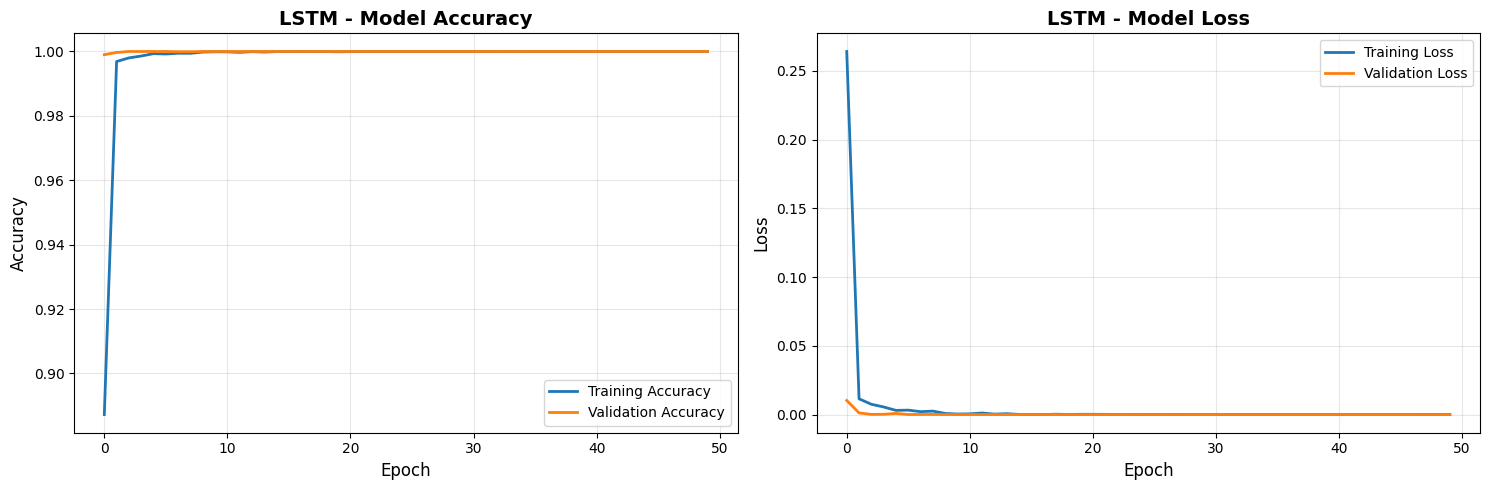


🧪 Evaluating LSTM on test set...
✅ LSTM Test Accuracy: 1.0000
✅ LSTM Test Loss: 0.0000
💾 LSTM model saved as 'final_lstm_model.keras'


In [ ]:
print("=" * 80)
print("TRAINING FINAL LSTM MODEL")
print("=" * 80)

# Extract best parameters
best_params = random_search.best_params_

# Create final model with best parameters
final_lstm_model = create_lstm_model(
    input_shape=(sequence_length, X_train_seq.shape[2]),
    num_classes=len(np.unique(y_train)),
    lstm_units=best_params.get('model__lstm_units', 128),
    dropout_rate=best_params.get('model__dropout_rate', 0.3),
    num_layers=best_params.get('model__num_layers', 2),
    learning_rate=best_params.get('model__learning_rate', 0.001)
)

print("✅ Final LSTM model created with best hyperparameters")
final_lstm_model.summary()

# Define callbacks
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_lstm_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

# Train the final model
print("\n🚀 Training final LSTM model...")
history_lstm = final_lstm_model.fit(
    X_train_seq,
    y_train_seq,
    batch_size=best_params.get('batch_size', 64),
    epochs=best_params.get('epochs', 100),
    validation_data=(X_val_seq, y_val_seq),
    callbacks=callbacks,
    verbose=1
)

# Plot training history
def plot_training_history(history, model_name="LSTM"):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0].set_title(f'{model_name} - Model Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot loss
    axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1].set_title(f'{model_name} - Model Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

print("\n📊 LSTM Training History:")
plot_training_history(history_lstm, "LSTM")

# Evaluate on test set
print("\n🧪 Evaluating LSTM on test set...")
test_loss_lstm, test_accuracy_lstm = final_lstm_model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"✅ LSTM Test Accuracy: {test_accuracy_lstm:.4f}")
print(f"✅ LSTM Test Loss: {test_loss_lstm:.4f}")

# Save the model
final_lstm_model.save('final_lstm_model.keras')
print("💾 LSTM model saved as 'final_lstm_model.keras'")

In [ ]:
print("=" * 80)
print("MODEL 2: 1D CONVOLUTIONAL NEURAL NETWORK (1D-CNN)")
print("=" * 80)

def create_1d_cnn_model(input_shape, num_classes,
                       filters=64,
                       kernel_size=3,
                       pool_size=2,
                       dropout_rate=0.5,
                       learning_rate=0.001):

    model = keras.Sequential()

    # Input layer
    model.add(layers.Input(shape=input_shape))

    # First Conv1D block
    model.add(layers.Conv1D(filters=filters, kernel_size=kernel_size,
                           padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=pool_size))
    model.add(layers.Dropout(dropout_rate))

    # Second Conv1D block
    model.add(layers.Conv1D(filters=filters*2, kernel_size=kernel_size,
                           padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=pool_size))
    model.add(layers.Dropout(dropout_rate))

    # Third Conv1D block
    model.add(layers.Conv1D(filters=filters*4, kernel_size=kernel_size,
                           padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling1D())
    model.add(layers.Dropout(dropout_rate))

    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile model
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Test model creation
test_cnn_model = create_1d_cnn_model(
    input_shape=(sequence_length, X_train_seq.shape[2]),
    num_classes=len(np.unique(y_train)),
    filters=64,
    kernel_size=3
)

print("✅ 1D-CNN model architecture created successfully!")
test_cnn_model.summary()


MODEL 2: 1D CONVOLUTIONAL NEURAL NETWORK (1D-CNN)
✅ 1D-CNN model architecture created successfully!


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 64)         │         2,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 20, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 10, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 5, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 5, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_85          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_86          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,115 (664.51 KB)

 Trainable params: 168,835 (659.51 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [ ]:
def build_cnn_classifier(filters=64, kernel_size=3, dropout_rate=0.5,
                        learning_rate=0.001):

    model = create_1d_cnn_model(
        input_shape=(sequence_length, X_train_seq.shape[2]),
        num_classes=len(np.unique(y_train)),
        filters=filters,
        kernel_size=kernel_size,
        dropout_rate=dropout_rate,
        learning_rate=learning_rate
    )
    return model

# Define parameter grid for Random Search
cnn_param_grid = {
    'model__filters': [32, 64, 128],
    'model__kernel_size': [3, 5, 7],
    'model__dropout_rate': [0.3, 0.4, 0.5],
    'model__learning_rate': [0.001, 0.0005],
    'batch_size': [32, 64, 128],
    'epochs': [30, 50]
}

# Create KerasClassifier
cnn_classifier = KerasClassifier(
    model=build_cnn_classifier, # Pass the function itself, not its call
    verbose=0,
    random_state=SEED
)

print("🧪 Starting 1D-CNN hyperparameter tuning with Random Search...")

# Create RandomizedSearchCV
cnn_random_search = RandomizedSearchCV(
    estimator=cnn_classifier,
    param_distributions=cnn_param_grid,
    n_iter=6,  # Number of parameter settings to sample
    cv=2,      # 2-fold cross-validation
    verbose=2,
    random_state=SEED,
    n_jobs=1,
    scoring='accuracy'
)

# Fit RandomizedSearchCV
print("\n⏳ Training 1D-CNN with hyperparameter tuning...")
start_time_cnn = time.time()

cnn_random_search.fit(X_train_subset, y_train_subset)

cnn_training_time = time.time() - start_time_cnn
print(f"✅ 1D-CNN hyperparameter tuning completed in {cnn_training_time:.2f} seconds")

print(f"\n🏆 Best parameters found:")
for param, value in cnn_random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"🎯 Best cross-validation score: {cnn_random_search.best_score_:.4f}")

🧪 Starting 1D-CNN hyperparameter tuning with Random Search...

⏳ Training 1D-CNN with hyperparameter tuning...
Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END batch_size=64, epochs=30, model__dropout_rate=0.4, model__filters=64, model__kernel_size=3, model__learning_rate=0.001; total time=  11.8s
[CV] END batch_size=64, epochs=30, model__dropout_rate=0.4, model__filters=64, model__kernel_size=3, model__learning_rate=0.001; total time=  11.4s
[CV] END batch_size=64, epochs=30, model__dropout_rate=0.3, model__filters=32, model__kernel_size=3, model__learning_rate=0.001; total time=  12.7s
[CV] END batch_size=64, epochs=30, model__dropout_rate=0.3, model__filters=32, model__kernel_size=3, model__learning_rate=0.001; total time=  11.3s
[CV] END batch_size=64, epochs=30, model__dropout_rate=0.4, model__filters=64, model__kernel_size=7, model__learning_rate=0.0005; total time=  11.7s
[CV] END batch_size=64, epochs=30, model__dropout_rate=0.4, model__filters=64, model__ke

TRAINING FINAL 1D-CNN MODEL
✅ Final 1D-CNN model created with best hyperparameters

🚀 Training final 1D-CNN model...
Epoch 1/30
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5004 - loss: 1.0817
Epoch 1: val_accuracy improved from None to 0.83289, saving model to best_cnn_model.keras
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.5925 - loss: 0.8894 - val_accuracy: 0.8329 - val_loss: 0.3980 - learning_rate: 5.0000e-04
Epoch 2/30
1904/1912 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 0.4062
Epoch 2: val_accuracy improved from 0.83289 to 0.98786, saving model to best_cnn_model.keras
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8745 - loss: 0.3122 - val_accuracy: 0.9879 - val_loss: 0.0469 - learning_rate: 5.0000e-04
Epoch 3/30
1903/1912 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9536 - loss: 0.1302
Epoch 3: val_accuracy improved from 0.98786 to 0.99870, saving model to best_cnn_model.keras
1912/1912 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc

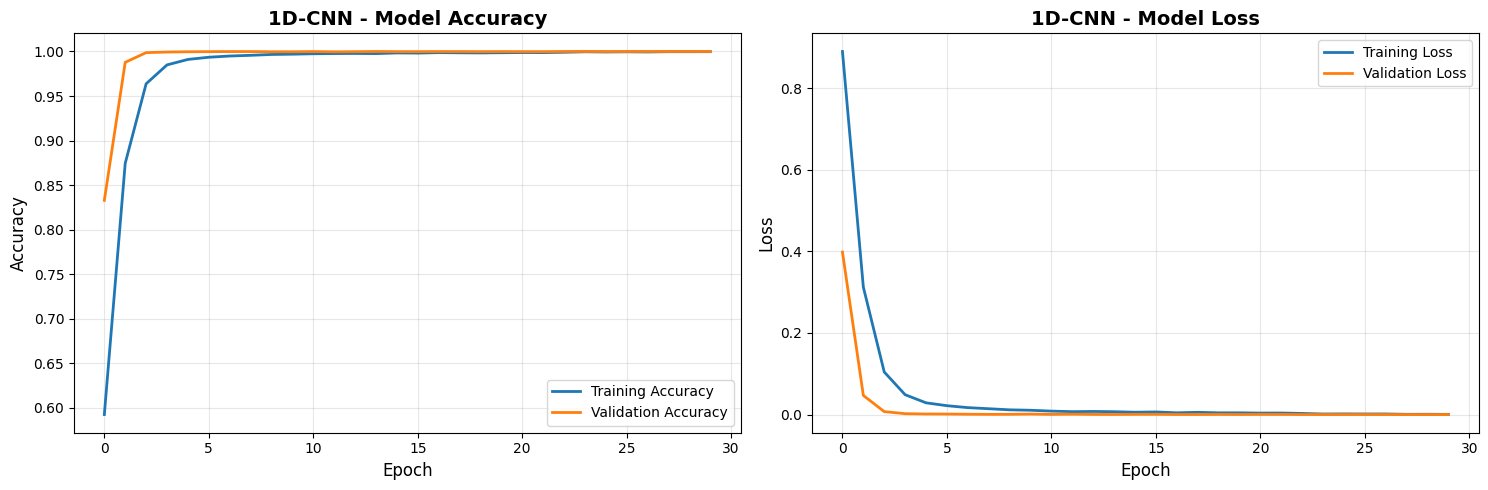


🧪 Evaluating 1D-CNN on test set...
✅ 1D-CNN Test Accuracy: 1.0000
✅ 1D-CNN Test Loss: 0.0000
💾 1D-CNN model saved as 'final_cnn_model.keras'


In [ ]:
print("=" * 80)
print("TRAINING FINAL 1D-CNN MODEL")
print("=" * 80)

# Extract best parameters
best_cnn_params = cnn_random_search.best_params_

# Create final model with best parameters
final_cnn_model = create_1d_cnn_model(
    input_shape=(sequence_length, X_train_seq.shape[2]),
    num_classes=len(np.unique(y_train)),
    filters=best_cnn_params.get('model__filters', 64),
    kernel_size=best_cnn_params.get('model__kernel_size', 3),
    dropout_rate=best_cnn_params.get('model__dropout_rate', 0.5),
    learning_rate=best_cnn_params.get('model__learning_rate', 0.001)
)

print("✅ Final 1D-CNN model created with best hyperparameters")

# Define callbacks for CNN
cnn_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_cnn_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

# Train the final CNN model
print("\n🚀 Training final 1D-CNN model...")
history_cnn = final_cnn_model.fit(
    X_train_seq,
    y_train_seq,
    batch_size=best_cnn_params.get('batch_size', 64),
    epochs=best_cnn_params.get('epochs', 50),
    validation_data=(X_val_seq, y_val_seq),
    callbacks=cnn_callbacks,
    verbose=1
)

# Plot training history
print("\n📊 1D-CNN Training History:")
plot_training_history(history_cnn, "1D-CNN")

# Evaluate on test set
print("\n🧪 Evaluating 1D-CNN on test set...")
test_loss_cnn, test_accuracy_cnn = final_cnn_model.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"✅ 1D-CNN Test Accuracy: {test_accuracy_cnn:.4f}")
print(f"✅ 1D-CNN Test Loss: {test_loss_cnn:.4f}")

# Save the model
final_cnn_model.save('final_cnn_model.keras')
print("💾 1D-CNN model saved as 'final_cnn_model.keras'")

In [8]:
print("=" * 80)
print("MODEL 3: SUPPORT VECTOR MACHINE (SVM)")
print("=" * 80)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import time # Import the time module

# For SVM, we need to flatten the sequence data or use only tabular data
# Let's use the original scaled tabular data for SVM

print("📊 Using tabular (non-sequential) data for SVM...")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Validation data shape: {X_val_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")

# Define SVM model
svm_model = SVC(random_state=SEED, probability=True)

# Define parameter grid for Grid Search
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3, 4]  # Only used for poly kernel
}

print("\n🧪 Starting SVM hyperparameter tuning with Grid Search...")
print(f"📊 Parameter grid size: {len(svm_param_grid['C']) * len(svm_param_grid['kernel']) * len(svm_param_grid['gamma'])} combinations")

# Use subset for faster training
svm_subset_size = min(1000, len(X_train_scaled))
X_train_svm_subset = X_train_scaled[:svm_subset_size]
y_train_svm_subset = y_train[:svm_subset_size]

print(f"  Using {svm_subset_size} samples for SVM tuning")

# Perform Grid Search with cross-validation
print("\n⏳ Training SVM with Grid Search...")
start_time_svm = time.time()

svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1,  # Use all available cores
    scoring='accuracy'
)

svm_grid_search.fit(X_train_svm_subset, y_train_svm_subset)

svm_training_time = time.time() - start_time_svm
print(f"✅ SVM hyperparameter tuning completed in {svm_training_time:.2f} seconds")

print(f"\n🏆 Best parameters found:")
for param, value in svm_grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"🎯 Best cross-validation score: {svm_grid_search.best_score_:.4f}")



MODEL 3: SUPPORT VECTOR MACHINE (SVM)
📊 Using tabular (non-sequential) data for SVM...
Training data shape: (61191, 15)
Validation data shape: (13113, 15)
Test data shape: (13113, 15)

🧪 Starting SVM hyperparameter tuning with Grid Search...
📊 Parameter grid size: 48 combinations
  Using 1000 samples for SVM tuning

⏳ Training SVM with Grid Search...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
✅ SVM hyperparameter tuning completed in 67.50 seconds

🏆 Best parameters found:
  C: 10
  degree: 2
  gamma: scale
  kernel: linear
🎯 Best cross-validation score: 1.0000



🚀 Training final SVM model with best parameters...
✅ SVM Validation Accuracy: 1.0000
✅ SVM Test Accuracy: 1.0000

📋 SVM Classification Report:
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00      2938
 malfunction       1.00      1.00      1.00      2705
      normal       1.00      1.00      1.00      7470

    accuracy                           1.00     13113
   macro avg       1.00      1.00      1.00     13113
weighted avg       1.00      1.00      1.00     13113



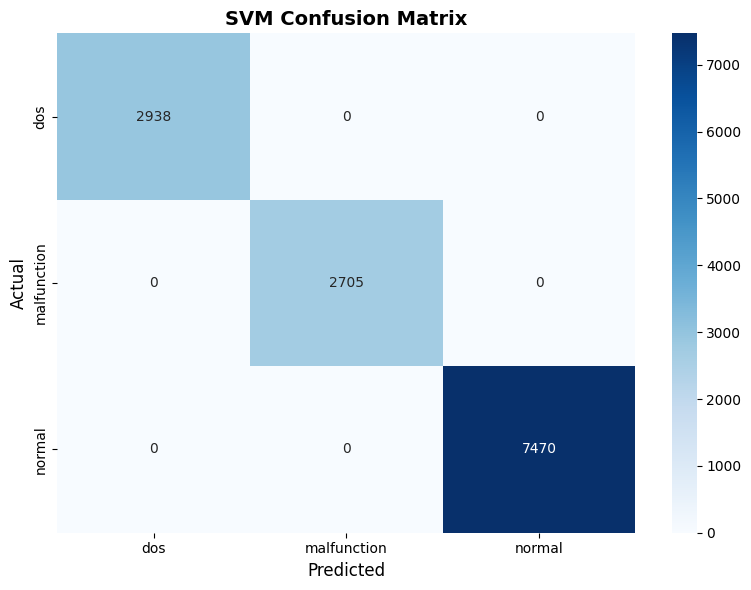

💾 SVM model saved as 'final_svm_model.pkl'


In [9]:
# Train final SVM model with best parameters
print("\n🚀 Training final SVM model with best parameters...")
final_svm_model = svm_grid_search.best_estimator_

# Train on full training set (or larger subset)
train_size_final = min(1000, len(X_train_scaled))
final_svm_model.fit(X_train_scaled[:train_size_final], y_train[:train_size_final])

# Evaluate on validation set
val_accuracy_svm = final_svm_model.score(X_val_scaled, y_val)
print(f"✅ SVM Validation Accuracy: {val_accuracy_svm:.4f}")

# Evaluate on test set
test_accuracy_svm = final_svm_model.score(X_test_scaled, y_test)
print(f"✅ SVM Test Accuracy: {test_accuracy_svm:.4f}")

# Make predictions
y_pred_svm = final_svm_model.predict(X_test_scaled)

# Classification report
print("\n📋 SVM Classification Report:")
print(classification_report(y_test, y_pred_svm,
                           target_names=label_encoder.classes_))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

# Save the model
import joblib
joblib.dump(final_svm_model, 'final_svm_model.pkl')
print("💾 SVM model saved as 'final_svm_model.pkl'")

In [12]:
!pip install tf-keras

In [21]:
print("=" * 80)
print("MODEL 5: VARIATIONAL AUTOENCODER (VAE)")
print("=" * 80)

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Temporarily disable mixed precision for VAE
original_policy = tf.keras.mixed_precision.global_policy()
tf.keras.mixed_precision.set_global_policy('float32')
print(f"Temporarily switched to float32 policy for VAE (was: {original_policy})")

MODEL 5: VARIATIONAL AUTOENCODER (VAE)
Temporarily switched to float32 policy for VAE (was: <DTypePolicy "float32">)


In [41]:
def create_vae_model_custom(input_dim, latent_dim=16):
    """VAE implementation that avoids symbolic tensor issues"""

    # Build encoder
    encoder_inputs = keras.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)

    z_mean = layers.Dense(latent_dim)(x)
    z_log_var = layers.Dense(latent_dim)(x)

    # Use a custom layer for sampling to avoid symbolic tensor issues
    class SamplingLayer(layers.Layer):
        def call(self, inputs):
            z_mean, z_log_var = inputs
            batch = tf.shape(z_mean)[0]
            dim = tf.shape(z_mean)[1]
            epsilon = tf.random.normal(shape=(batch, dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = SamplingLayer()([z_mean, z_log_var])

    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

    # Build decoder
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(64, activation='relu')(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    decoder_outputs = layers.Dense(input_dim, activation='sigmoid')(x)

    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

    # Build VAE
    vae_outputs = decoder(encoder(encoder_inputs)[2])
    vae = keras.Model(encoder_inputs, vae_outputs, name="vae")

    return encoder, decoder, vae

def vae_loss(model, x, x_recon):
    """Custom VAE loss function"""
    z_mean, z_log_var, _ = model.encoder(x)

    # Reconstruction loss: Manual MSE calculation
    reconstruction_loss = tf.reduce_mean(
        tf.reduce_sum(
            tf.square(x - x_recon),
            axis=1
        )
    )

    # KL divergence
    kl_loss = -0.5 * tf.reduce_mean(
        tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
            axis=1
        )
    )

    return reconstruction_loss + kl_loss

# Compile with dummy loss since we'll use custom training
def compile_vae(vae, encoder, decoder):
    """Compile VAE with a placeholder loss"""
    vae.compile(optimizer='adam')
    vae.encoder = encoder  # Store encoder in model for loss computation
    vae.decoder = decoder  # Store decoder in model for custom training loop

    # Create a custom train step
    @tf.function
    def train_step(x):
        with tf.GradientTape() as tape:
            x_recon = vae(x, training=True)
            loss = vae_loss(vae, x, x_recon)

        gradients = tape.gradient(loss, vae.trainable_variables)
        vae.optimizer.apply_gradients(zip(gradients, vae.trainable_variables))
        return loss

    vae.custom_train_step = train_step
    return vae
print("✅ VAE model with custom training defined successfully!")

✅ VAE model with custom training defined successfully!


In [39]:
# Prepare data for VAE (normalize to [0, 1])
vae_scaler = MinMaxScaler()
X_train_vae = vae_scaler.fit_transform(X_train_scaled).astype(np.float32)
X_val_vae = vae_scaler.transform(X_val_scaled).astype(np.float32)
X_test_vae = vae_scaler.transform(X_test_scaled).astype(np.float32)

input_dim = X_train_vae.shape[1]
print(f"Input dimension for VAE: {input_dim}")
print(f"Training samples: {X_train_vae.shape[0]}")
print(f"Validation samples: {X_val_vae.shape[0]}")
print(f"Test samples: {X_test_vae.shape[0]}")

Input dimension for VAE: 15
Training samples: 61191
Validation samples: 13113
Test samples: 13113


In [42]:
# Create VAE model
print("Creating VAE model...")

# Try the simplest version first
try:
    encoder, decoder, vae = create_vae_model_simple(input_dim, latent_dim=16)
    print("✅ Using simple VAE implementation")
except Exception as e:
    print(f"⚠️ Simple VAE failed: {e}")
    print("Trying custom training loop version...")

    # Use the custom training version
    encoder, decoder, vae = create_vae_model_custom(input_dim, latent_dim=16)
    vae = compile_vae(vae, encoder, decoder)
    print("✅ Using custom training VAE implementation")

# For simple VAE, compile normally
if hasattr(vae, 'losses') and len(vae.losses) > 0:
    vae.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001))
    print("VAE model summary:")
    vae.summary()

    # Train VAE
    print("\n🚀 Training VAE model...")
    vae_history = vae.fit(
        X_train_vae,
        X_train_vae,  # Autoencoder target is the input itself
        epochs=50,
        batch_size=128,
        validation_data=(X_val_vae, X_val_vae),
        callbacks=[
            keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=8,
                restore_best_weights=True,
                verbose=1
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-6,
                verbose=1
            )
        ],
        verbose=1
    )
else:
    # Custom training
    print("Training VAE with custom loop...")
    epochs = 50
    batch_size = 128
    history = {'loss': [], 'val_loss': []}

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")

        # Training
        train_losses = []
        for i in range(0, len(X_train_vae), batch_size):
            batch = X_train_vae[i:i+batch_size]
            if len(batch) > 0:
                loss = vae.custom_train_step(batch)
                train_losses.append(loss)

        # Validation
        val_losses = []
        for i in range(0, len(X_val_vae), batch_size):
            batch = X_val_vae[i:i+batch_size]
            if len(batch) > 0:
                z_mean, z_log_var, z = vae.encoder(batch)
                x_recon = vae.decoder(z)
                loss = vae_loss(vae, batch, x_recon)
                val_losses.append(loss)

        avg_train_loss = np.mean(train_losses)
        avg_val_loss = np.mean(val_losses)

        history['loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)

        print(f"Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")

        # Early stopping
        if epoch > 10 and avg_val_loss > min(history['val_loss'][-10:]):
            print("Early stopping")
            break

    vae_history = type('obj', (object,), {'history': history})

print("\n✅ VAE training completed!")

Creating VAE model...
⚠️ Simple VAE failed: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```

Trying custom training loop version...
✅ Using custom training VAE implementation
Training VAE with custom loop...

Epoch 1/50
Loss: 0.3309 - Val Loss: 1.5341

Epoch 2/50
Loss: 0.0889 - Val Loss: 1.7893

Epoch 3/50
Loss: 0.0737 - Val Loss: 2.2889

Epoch 4/50
Loss: 0.0229 - Val Loss: 2.2391

Epoch 5/50
Loss: 0.0206 - Val Loss: 2.1407

Epoch 6/50
Loss: 0.0201 - Val Loss: 2.3712

Epoch 7/50
Loss: 0.060


🔍 Generating reconstructions...


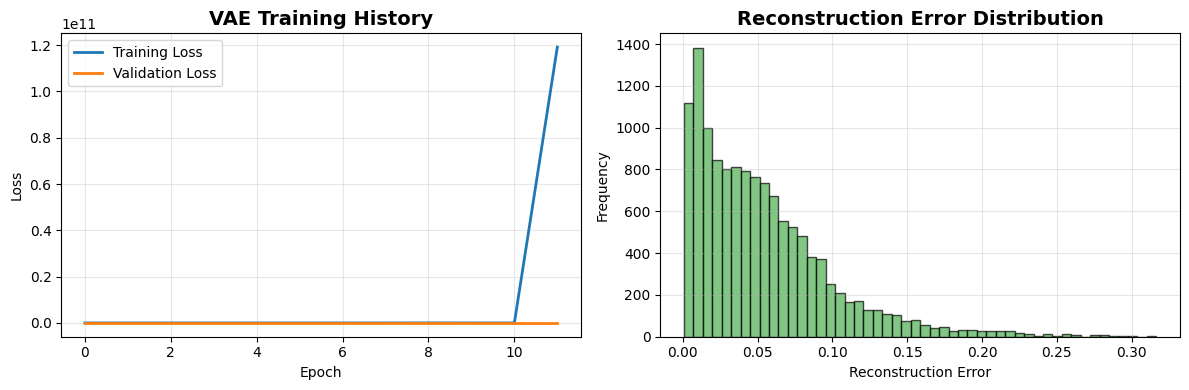

In [43]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(vae_history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(vae_history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('VAE Training History', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)

# Generate reconstructions
print("\n🔍 Generating reconstructions...")
X_test_reconstructed = vae.predict(X_test_vae, verbose=0)

# Calculate reconstruction error
reconstruction_error = np.mean(np.square(X_test_vae - X_test_reconstructed), axis=1)

plt.subplot(1, 2, 2)
plt.hist(reconstruction_error, bins=50, alpha=0.7, color='#4CAF50', edgecolor='black')
plt.title('Reconstruction Error Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


🎯 Using VAE for anomaly detection...
  Class dos:
    Mean error = 0.0555
    Std error = 0.0462
  Class malfunction:
    Mean error = 0.0574
    Std error = 0.0401
  Class normal:
    Mean error = 0.0509
    Std error = 0.0469


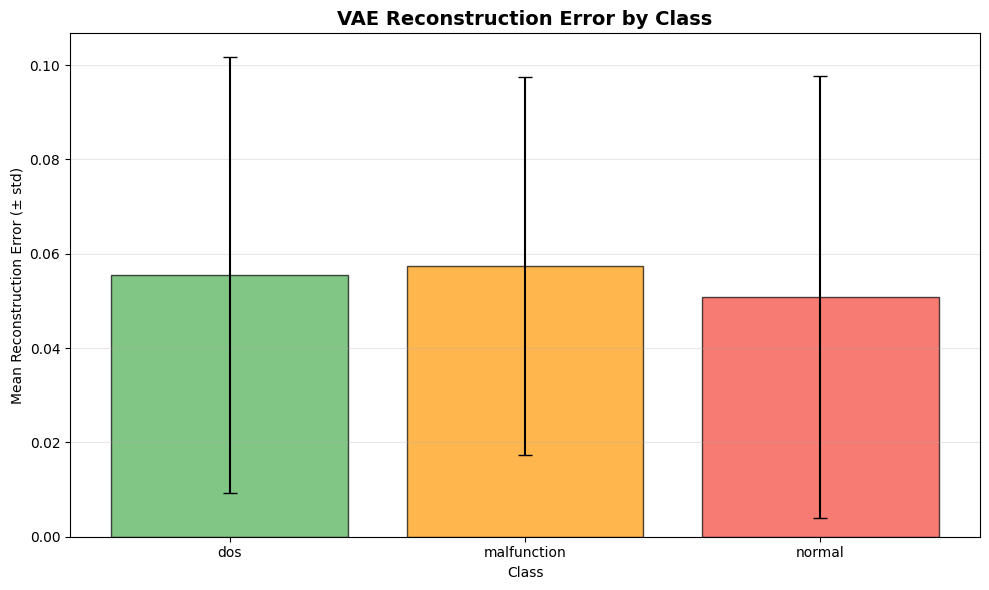

In [45]:
# Use VAE for anomaly detection
print("\n🎯 Using VAE for anomaly detection...")

# Calculate reconstruction error for each class
reconstruction_errors_by_class = {}
for cls in np.unique(y_test):
    cls_name = label_encoder.inverse_transform([cls])[0]
    cls_indices = np.where(y_test == cls)[0]
    if len(cls_indices) > 0:
        cls_errors = reconstruction_error[cls_indices]
        reconstruction_errors_by_class[cls_name] = {
            'mean': np.mean(cls_errors),
            'std': np.std(cls_errors),
            'median': np.median(cls_errors),
            'min': np.min(cls_errors),
            'max': np.max(cls_errors)
        }
        print(f"  Class {cls_name}:")
        print(f"    Mean error = {np.mean(cls_errors):.4f}")
        print(f"    Std error = {np.std(cls_errors):.4f}")

# Visualize reconstruction errors by class
plt.figure(figsize=(10, 6))
errors_data = []
error_stds = []
labels = []
for cls_name, stats in reconstruction_errors_by_class.items():
    errors_data.append(stats['mean'])
    error_stds.append(stats['std'])
    labels.append(cls_name)

colors = ['#4CAF50', '#FF9800', '#F44336'][:len(errors_data)]
x_pos = np.arange(len(errors_data))

plt.bar(x_pos, errors_data, yerr=error_stds,
        color=colors, alpha=0.7, capsize=5, edgecolor='black')
plt.xticks(x_pos, labels)
plt.title('VAE Reconstruction Error by Class', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Mean Reconstruction Error (± std)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [46]:
# Detect anomalies based on reconstruction error
print("\n🔍 Detecting anomalies...")
threshold = np.percentile(reconstruction_error, 95)  # 95th percentile as threshold
anomalies = reconstruction_error > threshold

print(f"Anomaly threshold: {threshold:.4f}")
print(f"Number of anomalies detected: {np.sum(anomalies)} ({np.sum(anomalies)/len(anomalies)*100:.1f}%)")

# Check which classes have most anomalies
print("\nAnomalies by class:")
for cls in np.unique(y_test):
    cls_name = label_encoder.inverse_transform([cls])[0]
    cls_indices = np.where(y_test == cls)[0]
    if len(cls_indices) > 0:
        cls_anomalies = anomalies[cls_indices]
        anomaly_rate = np.sum(cls_anomalies) / len(cls_anomalies) * 100
        print(f"  {cls_name}: {np.sum(cls_anomalies)} anomalies ({anomaly_rate:.1f}%)")


🔍 Detecting anomalies...
Anomaly threshold: 0.1415
Number of anomalies detected: 656 (5.0%)

Anomalies by class:
  dos: 150 anomalies (5.1%)
  malfunction: 97 anomalies (3.6%)
  normal: 409 anomalies (5.5%)


In [47]:
# Save the models
print("\n💾 Saving VAE models...")
try:
    encoder.save('vae_encoder.keras')
    decoder.save('vae_decoder.keras')
    vae.save('vae_model.keras')
    print("✅ VAE models saved successfully!")
except Exception as e:
    print(f"⚠️ Warning: Could not save models: {e}")
    print("Continuing with analysis...")

# Restore original mixed precision policy
tf.keras.mixed_precision.set_global_policy(original_policy)
print(f"\n✅ Restored original mixed precision policy: {tf.keras.mixed_precision.global_policy()}")


💾 Saving VAE models...
✅ VAE models saved successfully!

✅ Restored original mixed precision policy: <DTypePolicy "float32">



🎨 Visualizing sample reconstructions...


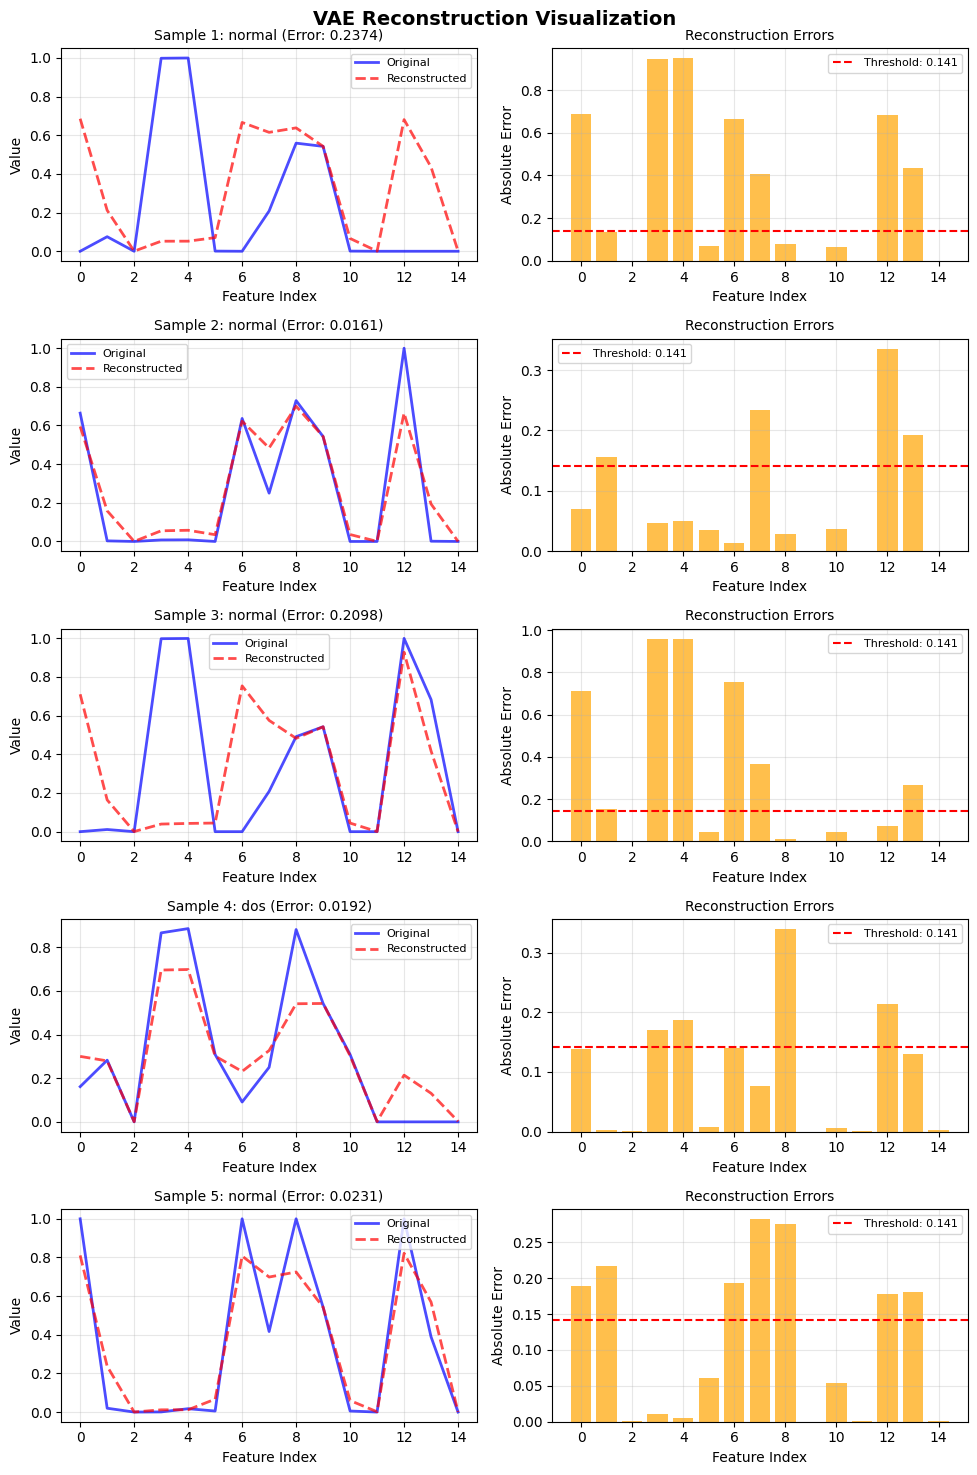

In [48]:
# Generate sample reconstructions for visualization
print("\n🎨 Visualizing sample reconstructions...")
n_samples = 5
sample_indices = np.random.choice(len(X_test_vae), n_samples, replace=False)

fig, axes = plt.subplots(n_samples, 2, figsize=(10, 3*n_samples))

if n_samples == 1:
    axes = [axes]

for idx, sample_idx in enumerate(sample_indices):
    original = X_test_vae[sample_idx]
    reconstructed = X_test_reconstructed[sample_idx]
    error = reconstruction_error[sample_idx]
    true_class = label_encoder.inverse_transform([y_test[sample_idx]])[0]

    # Plot original and reconstructed
    axes[idx][0].plot(original[:20], 'b-', label='Original', alpha=0.7, linewidth=2)
    axes[idx][0].plot(reconstructed[:20], 'r--', label='Reconstructed', alpha=0.7, linewidth=2)
    axes[idx][0].set_title(f'Sample {idx+1}: {true_class} (Error: {error:.4f})', fontsize=10)
    axes[idx][0].set_xlabel('Feature Index')
    axes[idx][0].set_ylabel('Value')
    axes[idx][0].legend(fontsize=8)
    axes[idx][0].grid(alpha=0.3)

    # Plot error
    axes[idx][1].bar(range(len(original[:20])), np.abs(original[:20] - reconstructed[:20]),
                    alpha=0.7, color='orange')
    axes[idx][1].axhline(y=threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.3f}')
    axes[idx][1].set_title(f'Reconstruction Errors', fontsize=10)
    axes[idx][1].set_xlabel('Feature Index')
    axes[idx][1].set_ylabel('Absolute Error')
    axes[idx][1].legend(fontsize=8)
    axes[idx][1].grid(alpha=0.3)

plt.suptitle('VAE Reconstruction Visualization', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [49]:
print("\n" + "="*60)
print("VAE TRAINING COMPLETED SUCCESSFULLY!")
print("="*60)
print("\n📊 Summary:")
print(f"• Final training loss: {vae_history.history['loss'][-1]:.4f}")
print(f"• Final validation loss: {vae_history.history['val_loss'][-1]:.4f}")
print(f"• Anomaly detection threshold: {threshold:.4f}")
print(f"• Anomalies detected: {np.sum(anomalies)} samples")

if reconstruction_errors_by_class:
    max_error_class = max(reconstruction_errors_by_class.items(), key=lambda x: x[1]['mean'])[0]
    print(f"• Classes with highest reconstruction error: {max_error_class}")

print("\n✅ VAE analysis complete!")


VAE TRAINING COMPLETED SUCCESSFULLY!

📊 Summary:
• Final training loss: 119169908736.0000
• Final validation loss: 19.2873
• Anomaly detection threshold: 0.1415
• Anomalies detected: 656 samples
• Classes with highest reconstruction error: malfunction

✅ VAE analysis complete!
